# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from datetime import timedelta

import yfinance as yf
import seaborn as sns



# Load and Convert DataSet

In [2]:
tck = yf.Ticker("INTC")
start_Data = "1995-08-1"

df = tck.history(start = start_Data, end = None)
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1995-08-01 00:00:00-04:00,4.579953,4.579953,4.403801,4.456647,94556800,0.0,0.0
1995-08-02 00:00:00-04:00,4.535912,4.579949,4.298106,4.333337,135620800,0.0,0.0
1995-08-03 00:00:00-04:00,4.210033,4.421416,4.165995,4.377378,117961600,0.0,0.0
1995-08-04 00:00:00-04:00,4.386187,4.439033,4.350957,4.368572,68723200,0.0,0.0
1995-08-07 00:00:00-04:00,4.403801,4.500685,4.386186,4.474262,51580000,0.0,0.0
...,...,...,...,...,...,...,...
2025-07-29 00:00:00-04:00,20.690001,20.850000,20.340000,20.410000,100831500,0.0,0.0
2025-07-30 00:00:00-04:00,20.430000,20.620001,20.080000,20.340000,67420300,0.0,0.0
2025-07-31 00:00:00-04:00,20.170000,20.230000,19.660000,19.799999,90665200,0.0,0.0


In [3]:
col_close = df.pop("Close")
df.insert(0, "Close", col_close)
df.head()

,Close,Open,High,Low,Volume,Dividends,Stock Splits
Date,,,,,,,
1995-08-01 00:00:00-04:00,4.456647,4.579953,4.579953,4.403801,94556800,0.0,0.0
1995-08-02 00:00:00-04:00,4.333337,4.535912,4.579949,4.298106,135620800,0.0,0.0
1995-08-03 00:00:00-04:00,4.377378,4.210033,4.421416,4.165995,117961600,0.0,0.0
1995-08-04 00:00:00-04:00,4.368572,4.386187,4.439033,4.350957,68723200,0.0,0.0
1995-08-07 00:00:00-04:00,4.474262,4.403801,4.500685,4.386186,51580000,0.0,0.0


In [4]:
df.columns

Index(['Close', 'Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

In [5]:
columns = ["Open", "High", "Low", "Close", "Volume", "Dividends", "Stock Splits"]

## Data Preprocessing

In [6]:
def check_df(df: object, head: object=5) -> object:
    print("\nShape of data frame")
    print(df.shape)
    print("\nTypes of data frame")
    print(df.dtypes)
    print("\nNaN values")
    print(df.isnull().sum())
    print("\nInfomation of data frame")
    print(df.info())

check_df(df)


Shape of data frame
(7552, 7)

Types of data frame
Close           float64
Open            float64
High            float64
Low             float64
Volume            int64
Dividends       float64
Stock Splits    float64
dtype: object

NaN values
Close           0
Open            0
High            0
Low             0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

Infomation of data frame
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7552 entries, 1995-08-01 00:00:00-04:00 to 2025-08-04 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Close         7552 non-null   float64
 1   Open          7552 non-null   float64
 2   High          7552 non-null   float64
 3   Low           7552 non-null   float64
 4   Volume        7552 non-null   int64  
 5   Dividends     7552 non-null   float64
 6   Stock Splits  7552 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 472.0

In [7]:
df["Volume"] = df["Volume"].astype("float64")

In [8]:
#Check the duplicated row
print("Number of duplicated rows: ", len(df[df.duplicated()]))

Number of duplicated rows:  0


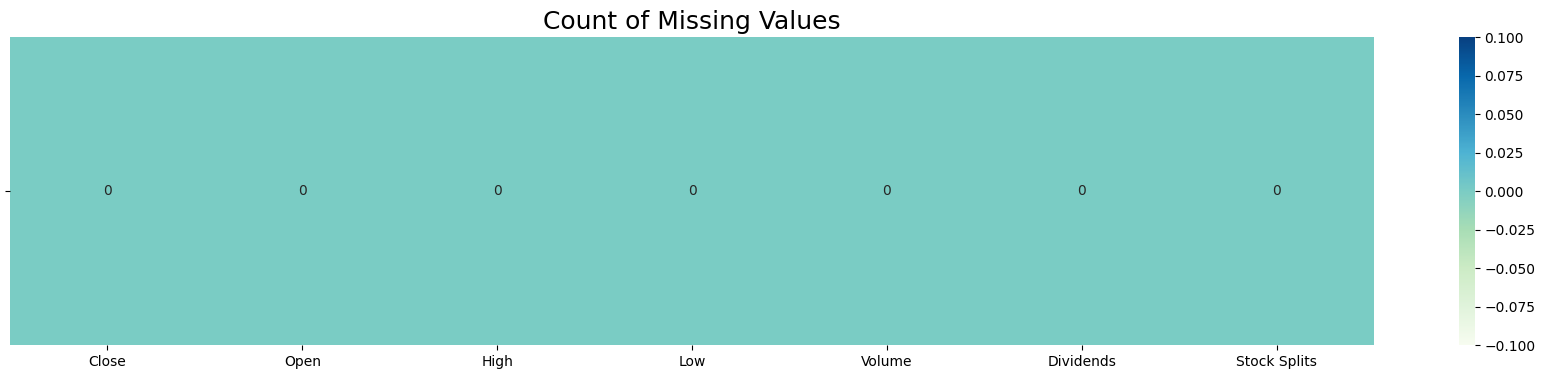

In [9]:
# Count the missing values by columns
plt.figure(figsize = (22, 4))
sns.heatmap((df.isna().sum()).to_frame(name='').T, cmap="GnBu", annot=True, fmt='0.0f').set_title("Count of Missing Values", fontsize = 18)
plt.show()


Không có sự trùng lặp dữ liệu và dữ liệu NaN

##### Bảng thông tin thống kê dữ liệu.

In [10]:
df.describe().T.style.background_gradient(cmap="BuGn", axis=1)

,count,mean,std,min,25%,50%,75%,max
Close,7552.000000,22.417913,12.847858,3.525119,13.046548,17.586316,29.354708,62.083332
Open,7552.000000,22.418699,12.844609,3.577996,13.069701,17.584747,29.368518,62.028760
High,7552.000000,22.720027,12.997794,3.639686,13.217909,17.802155,29.637438,62.292520
Low,7552.000000,22.119623,12.695441,3.511900,12.916995,17.366443,29.101056,60.600822
Volume,7552.000000,51979316.154661,30775731.048668,1155400.000000,30429175.000000,47225100.000000,65230075.000000,546630400.000000
Dividends,7552.000000,0.002358,0.023916,0.000000,0.000000,0.000000,0.000000,0.365000
Stock Splits,7552.000000,0.000794,0.039857,0.000000,0.000000,0.000000,0.000000,2.000000


In [11]:
# Tim du lieu duy nhat
df.apply(lambda x: len(x.unique()))

Close           6940
Open            7494
High            7493
Low             7502
Volume          7528
Dividends         26
Stock Splits       2
dtype: int64

# Data Visualization

## Analysis of Correlations

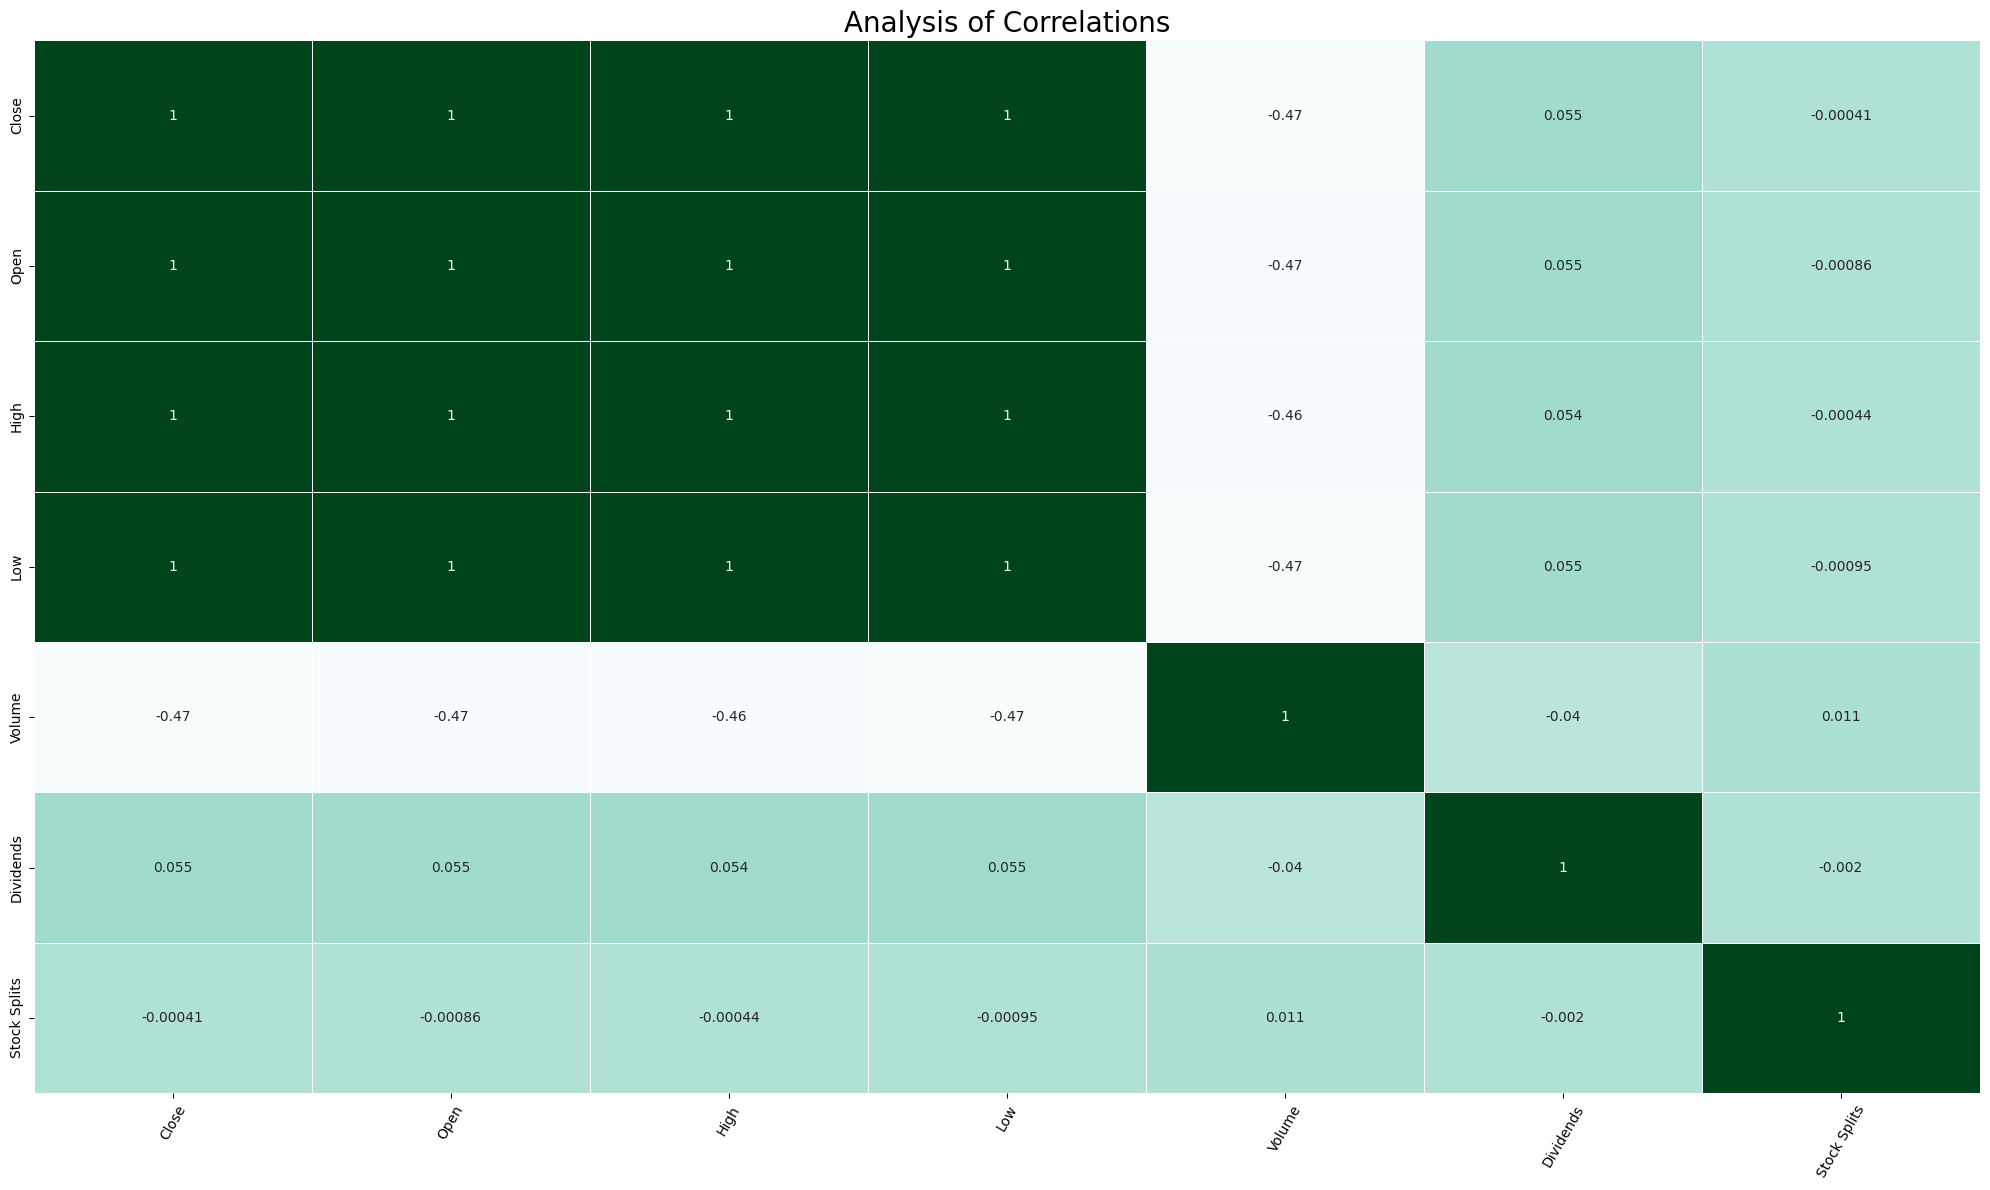

In [12]:
plt.figure(figsize=(20, 12))
sns.heatmap(df.corr(numeric_only=True), cmap="BuGn", annot=True, linewidths=.6, cbar=False)
plt.xticks(rotation = 60, size = 10)
plt.yticks(size=10)
plt.title("Analysis of Correlations", size=20)
plt.tight_layout()
plt.show()

- Tính tương quan giữa các biến giá cổ phiếu (Close, Open, High, Low):
    * Các mối quan hệ tương quan giữa 4 giá trị cổ phiếu này có giá trị bằng 1. Thể hiện một mối tương quan hoàn hảo và tích cực giữa chúng.
    * Các giá cổ phiếu có xu hướng hoạt động cùng chiều một cách chặt chẽ. Điều này được xác định một cách chính xác vì các mức giá này đều được mở bán trong cùng một thời gian giao dịch.
- Tính tương quan giữa các biến (Close, Open, High, Low) với các biến (Volume, Dividends, Stock Splits):
    * Với Volume: Các giá trị tương quan đều là -0.47~-0.46. Đây là tính tương quan tiêu cực và yếu. Điều này cho thấy có mối liên hệ yếu, khi giá tăng, khối lượng giao dịch có xu hướng giảm một chút, và ngược lại (Mối quan hệ này không mạnh).
    * Với Dividends: Các gia trị tương quan đều nằm ở mức 0.054. Đây là mức tương quan tích cực và rắt yếu. Mối quan hệ này không có mức ảnh hưởng nhiều đến giá cổ phiếu, cho thấy việc chi trả cổ tức không có mối liên hệ chặt chẽ với sự biến động của giá cổ phiếu.
    * Với Stock Splits: Các giá trị tương quan đều nằm trong mức 0.041~0.042. Đây là mối quan hệ tương quan tiêu cực và cực kỳ yếu. Việc chia tách cổ phiếu gần như không có mối quan hệ tương quan tuyến tính với sự biến động giá.
- Sự tương quan giữa các biến còn lại (Volume, Dividends, Stock Splits):
    * Các giá trị Volume, Dividends, Stock Splits không có mối tương quan liên hệ với nhau nên các giá trị tương quan tiêu cực và cực kỳ yếu.
    * Các ô trên đường chéo chính có giá trị tương quan mạnh mẽ vì một biến luôn tương quan mạnh mẽ với chính nó.

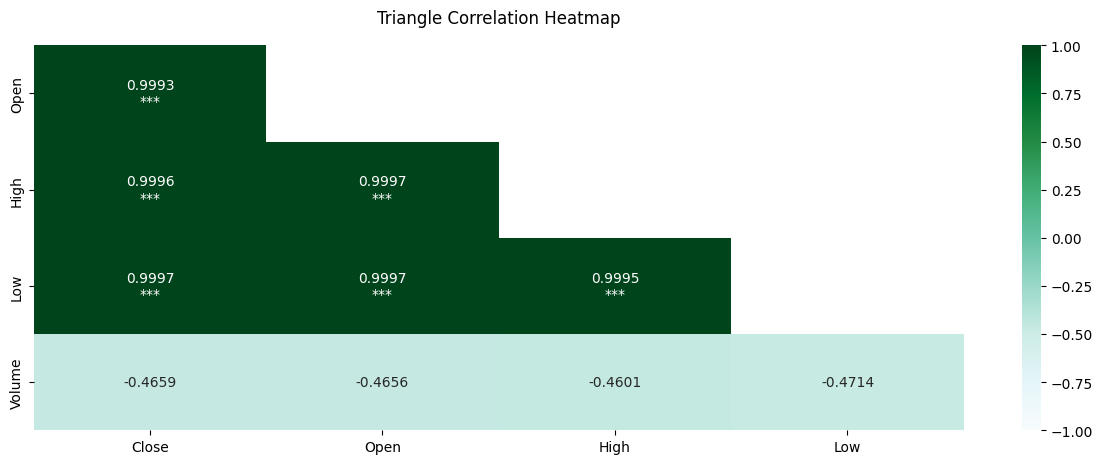

In [13]:
corr = df.corr(numeric_only=True)
f, ax = plt.subplots(figsize = (15,5))
mask = np.triu(np.ones_like(corr, dtype=bool))
cut_off = 0.25
extreme_1 = 0.5
extreme_2 = 0.75
extreme_3 = 0.9
mask |= np.abs(corr) < cut_off
corr = corr[~mask]
remove_empty_rows_and_cols = True
if remove_empty_rows_and_cols:
    wanted_cols = np.flatnonzero(np.count_nonzero(~mask, axis=1))
    wanted_rows = np.flatnonzero(np.count_nonzero(~mask, axis=0))
    corr = corr.iloc[wanted_cols, wanted_rows]

annot = [[f"{val:.4f}"
          + ('' if abs(val) < extreme_1 else '\n*')
          + ('' if abs(val) < extreme_2 else '*')
          + ('' if abs(val) < extreme_3 else '*')
          for val in row] for row in corr.to_numpy()]

heatmap = sns.heatmap(corr, vmin = -1, vmax=1, annot=annot, fmt='', cmap="BuGn")
heatmap.set_title("Triangle Correlation Heatmap", fontdict={'fontsize': 12}, pad = 16)
plt.show()

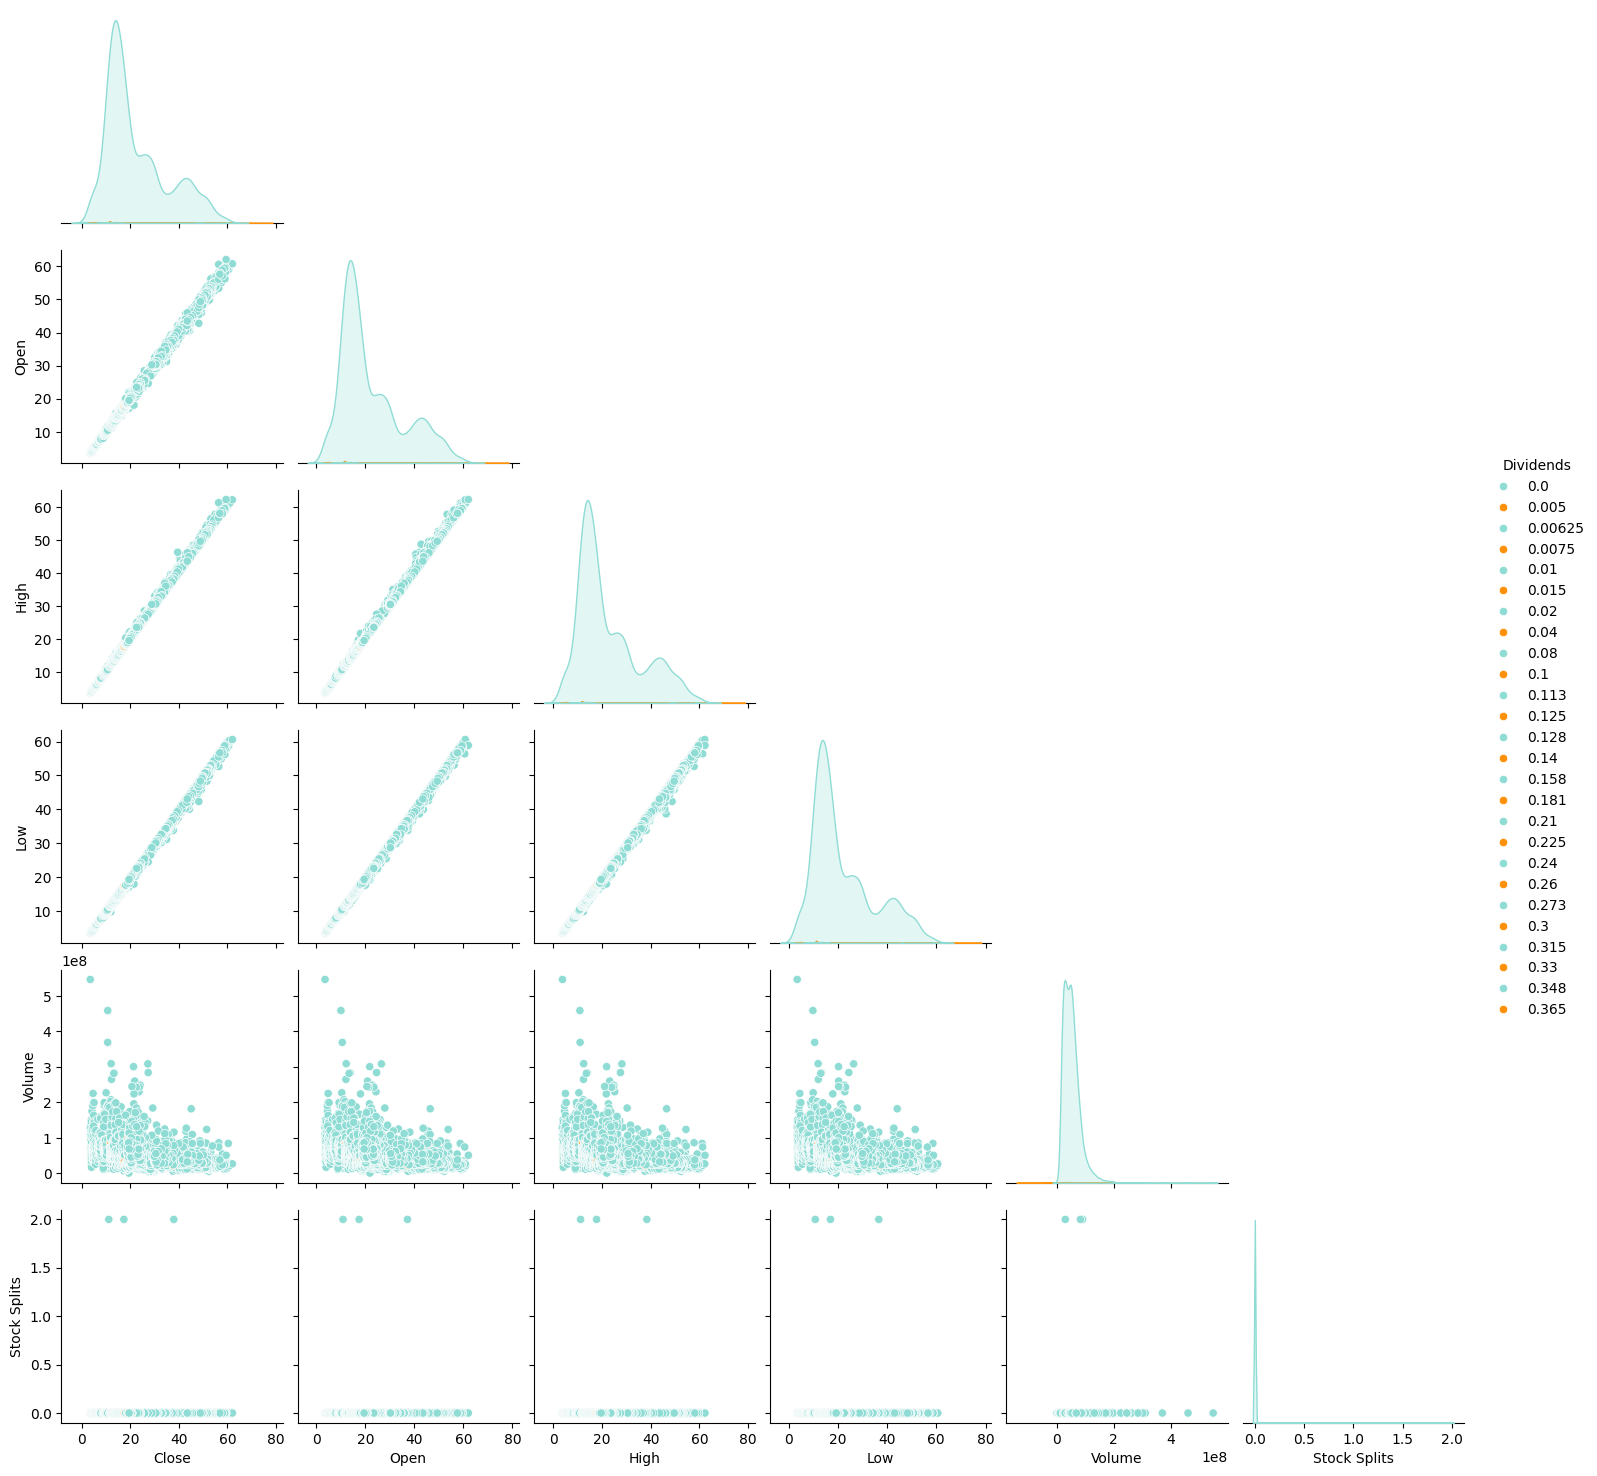

In [14]:
import warnings
warnings.filterwarnings('ignore')
custom_palette = sns.color_palette(["#8FDCD5", "#FF910A"])
sns.pairplot(data=df, diag_kind='kde', hue='Dividends', palette=custom_palette, corner=True)
plt.gcf().set_facecolor('#ffffff')
plt.show()

## Distributions of prices

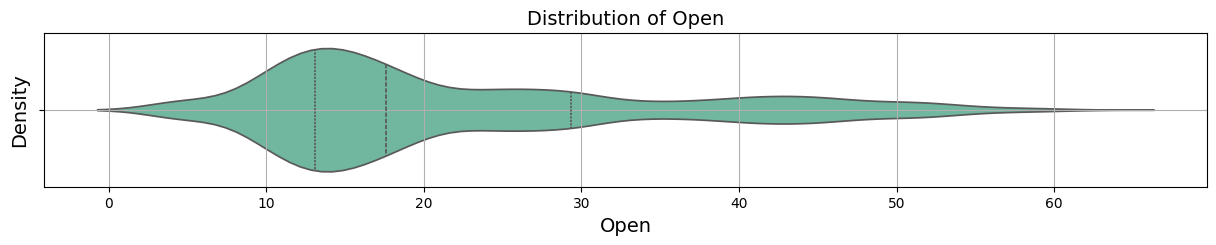

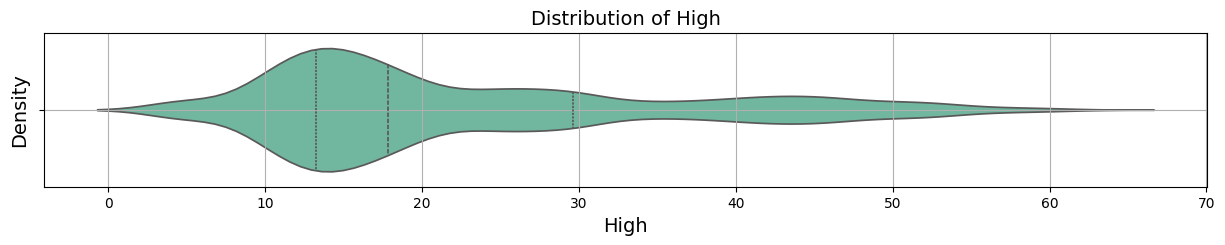

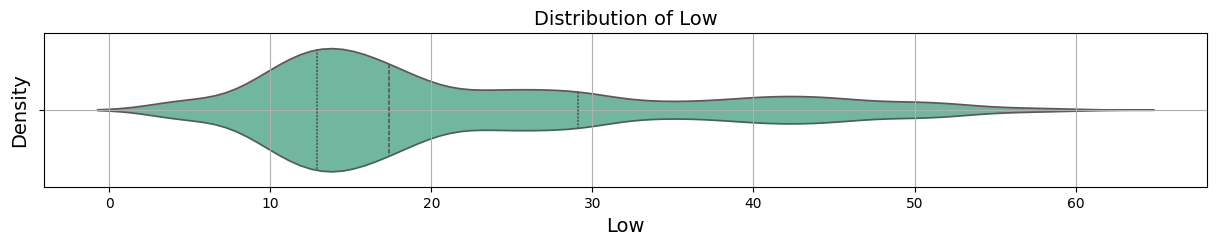

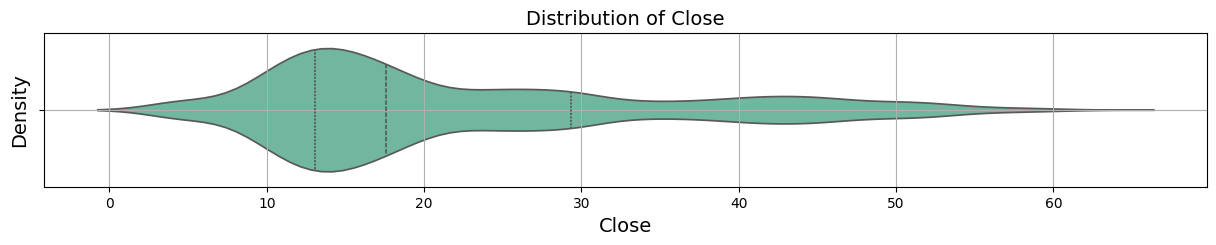

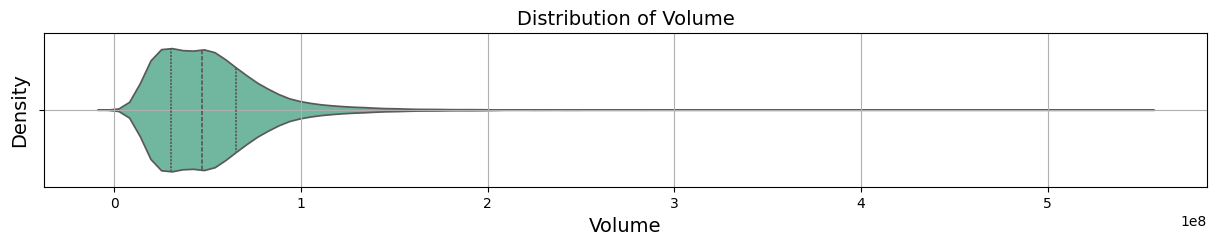

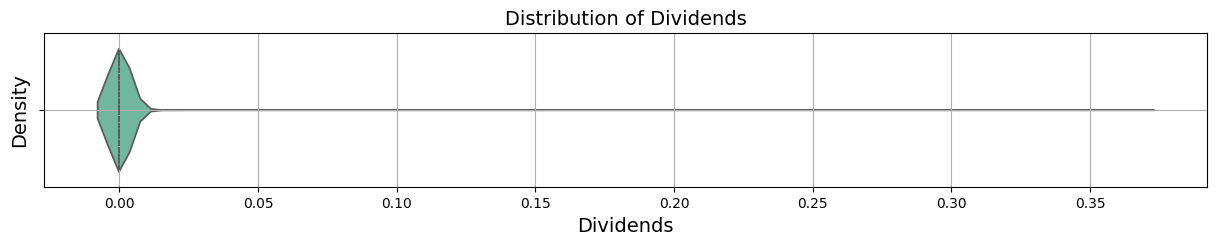

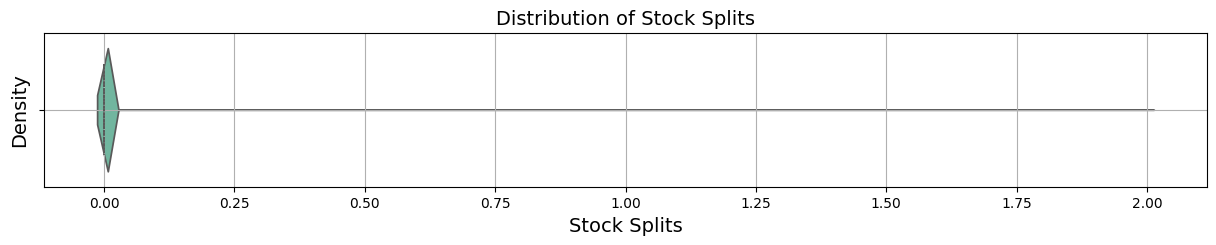

In [15]:
palette = "BuGn"
for column in columns:
    plt.figure(figsize=(15, 2))
    sns.violinplot(x=df[column], palette=palette, inner="quartitle")
    plt.title(f"Distribution of {column}", fontsize = 14)
    plt.xlabel(column, fontsize=14)
    plt.ylabel("Density", fontsize=14)
    plt.grid(True)
    plt.show()

## Boxplot Distribution of Prices

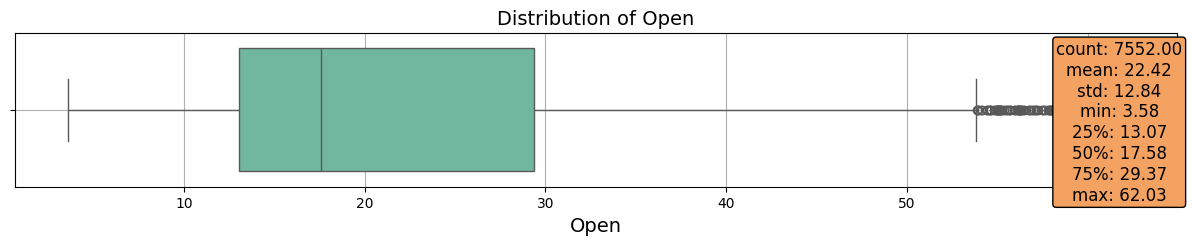

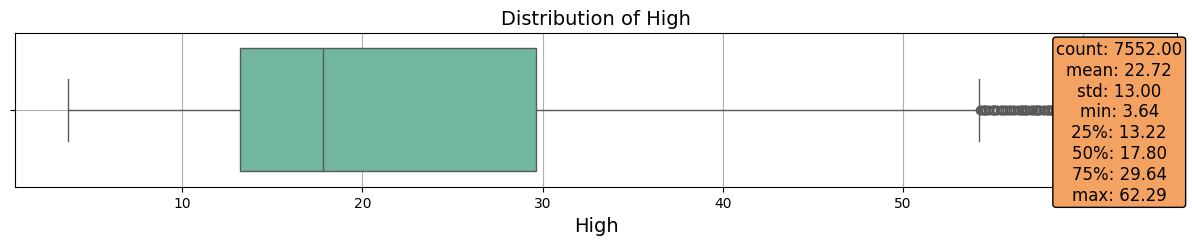

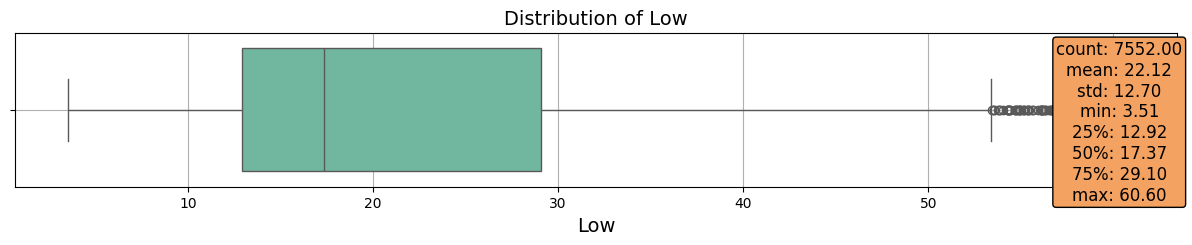

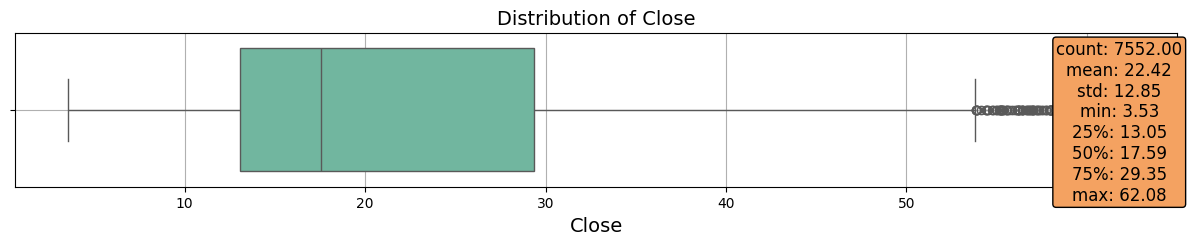

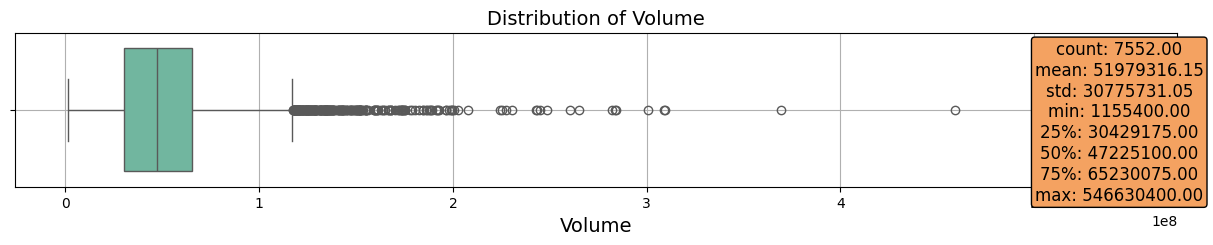

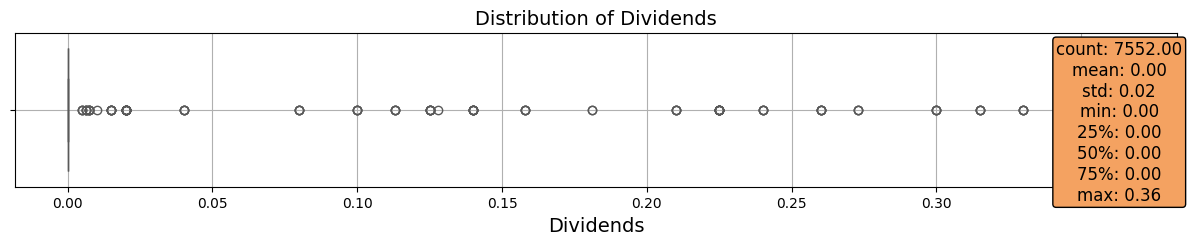

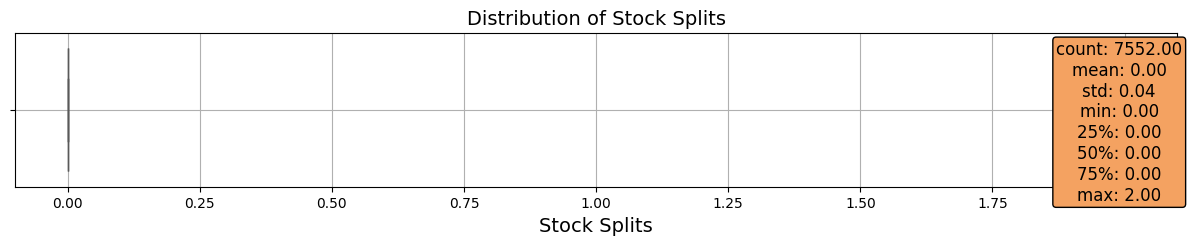

In [16]:
palette = "BuGn"
for column in columns:
    plt.figure(figsize=(15, 2))
    sns.boxplot(x=df[column], palette=palette)
    plt.title(f"Distribution of {column}", fontsize=14)
    plt.xlabel(column, fontsize=14)
    stats = df[column].describe()
    stats_text = "\n".join([f'{key}: {value:.2f}' for key, value in stats.items()])
    plt.text(0.95, 0.95, stats_text, transform=plt.gca().transAxes, 
             fontsize=12, verticalalignment='top', 
             horizontalalignment='center', bbox=dict(boxstyle='round,pad=0.2', edgecolor='black', facecolor='#f4a261'))
    plt.grid(True)
    plt.show()

## Attributes Stock Prices of Intel from 1995 to 2025

<function matplotlib.pyplot.show(close=None, block=None)>

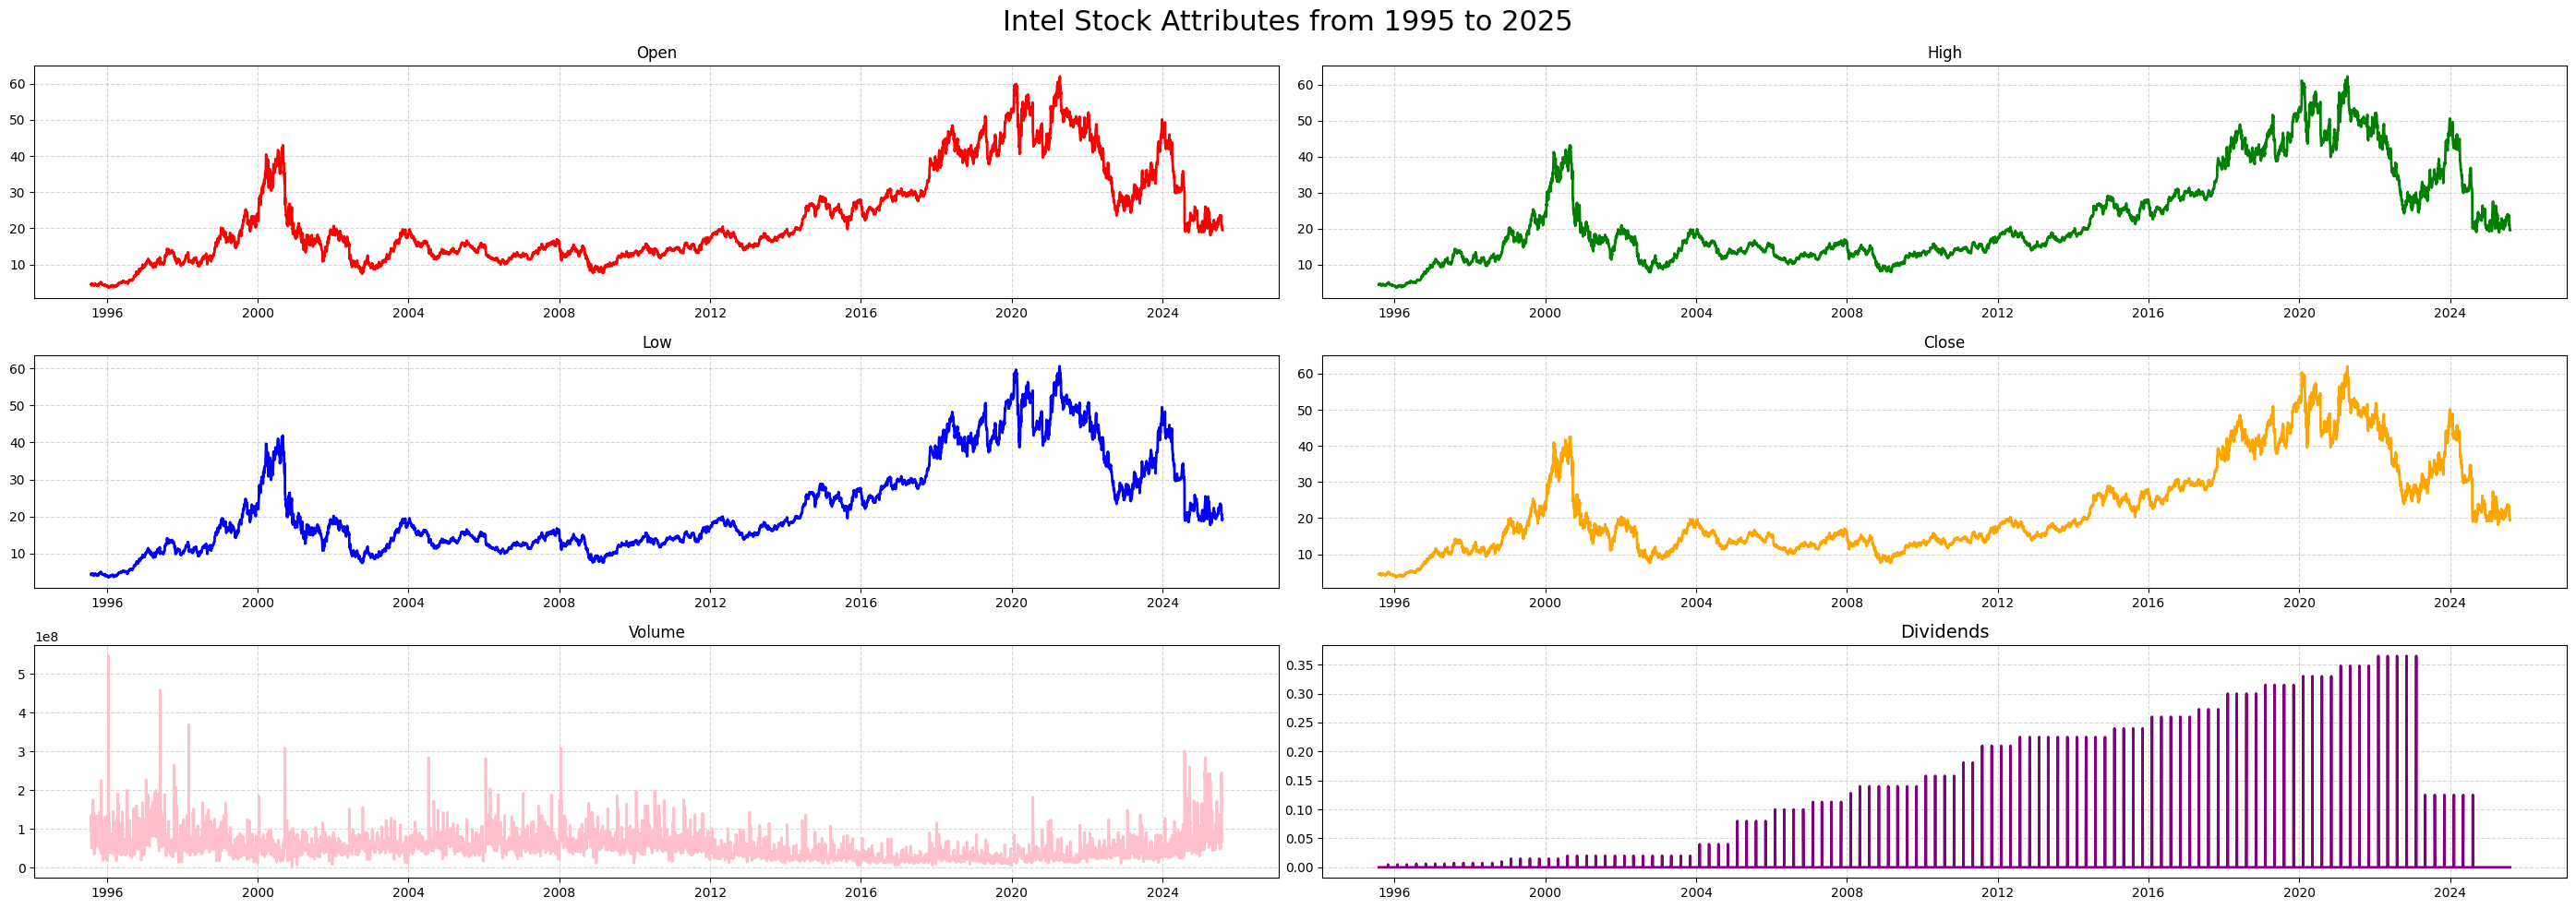

In [17]:
import matplotlib.pyplot as plt
x = df.index
colors = ['red', 'green', 'blue', 'orange', 'pink', 'purple']
plt.figure(figsize=(28, 10))
plt.subplot(3, 2, 1)
plt.plot(x, df["Open"], color = colors[0], linewidth=2)
plt.title('Open')
plt.grid(True, linestyle='--', alpha=0.5)
plt.subplot(3, 2, 2)
plt.plot(x, df["High"], color = colors[1], linewidth=2)
plt.title('High')
plt.grid(True, linestyle='--', alpha=0.5)
plt.subplot(3, 2, 3)
plt.plot(x, df["Low"], color = colors[2], linewidth=2)
plt.title('Low')
plt.grid(True, linestyle='--', alpha=0.5)
plt.subplot(3, 2, 4)
plt.plot(x, df["Close"], color = colors[3], linewidth=2)
plt.title('Close')
plt.grid(True, linestyle='--', alpha=0.5)
plt.subplot(3, 2, 5)
plt.plot(x, df["Volume"], color = colors[4], linewidth=2)
plt.title('Volume')
plt.grid(True, linestyle='--', alpha=0.5)
plt.subplot(3, 2, 6)
plt.plot(x, df['Dividends'], color=colors[5], linewidth=2)
plt.title('Dividends', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.suptitle("Intel Stock Attributes from 1995 to 2025", fontsize = 22, y=0.98)
plt.tight_layout()
plt.show


## Weekly Component

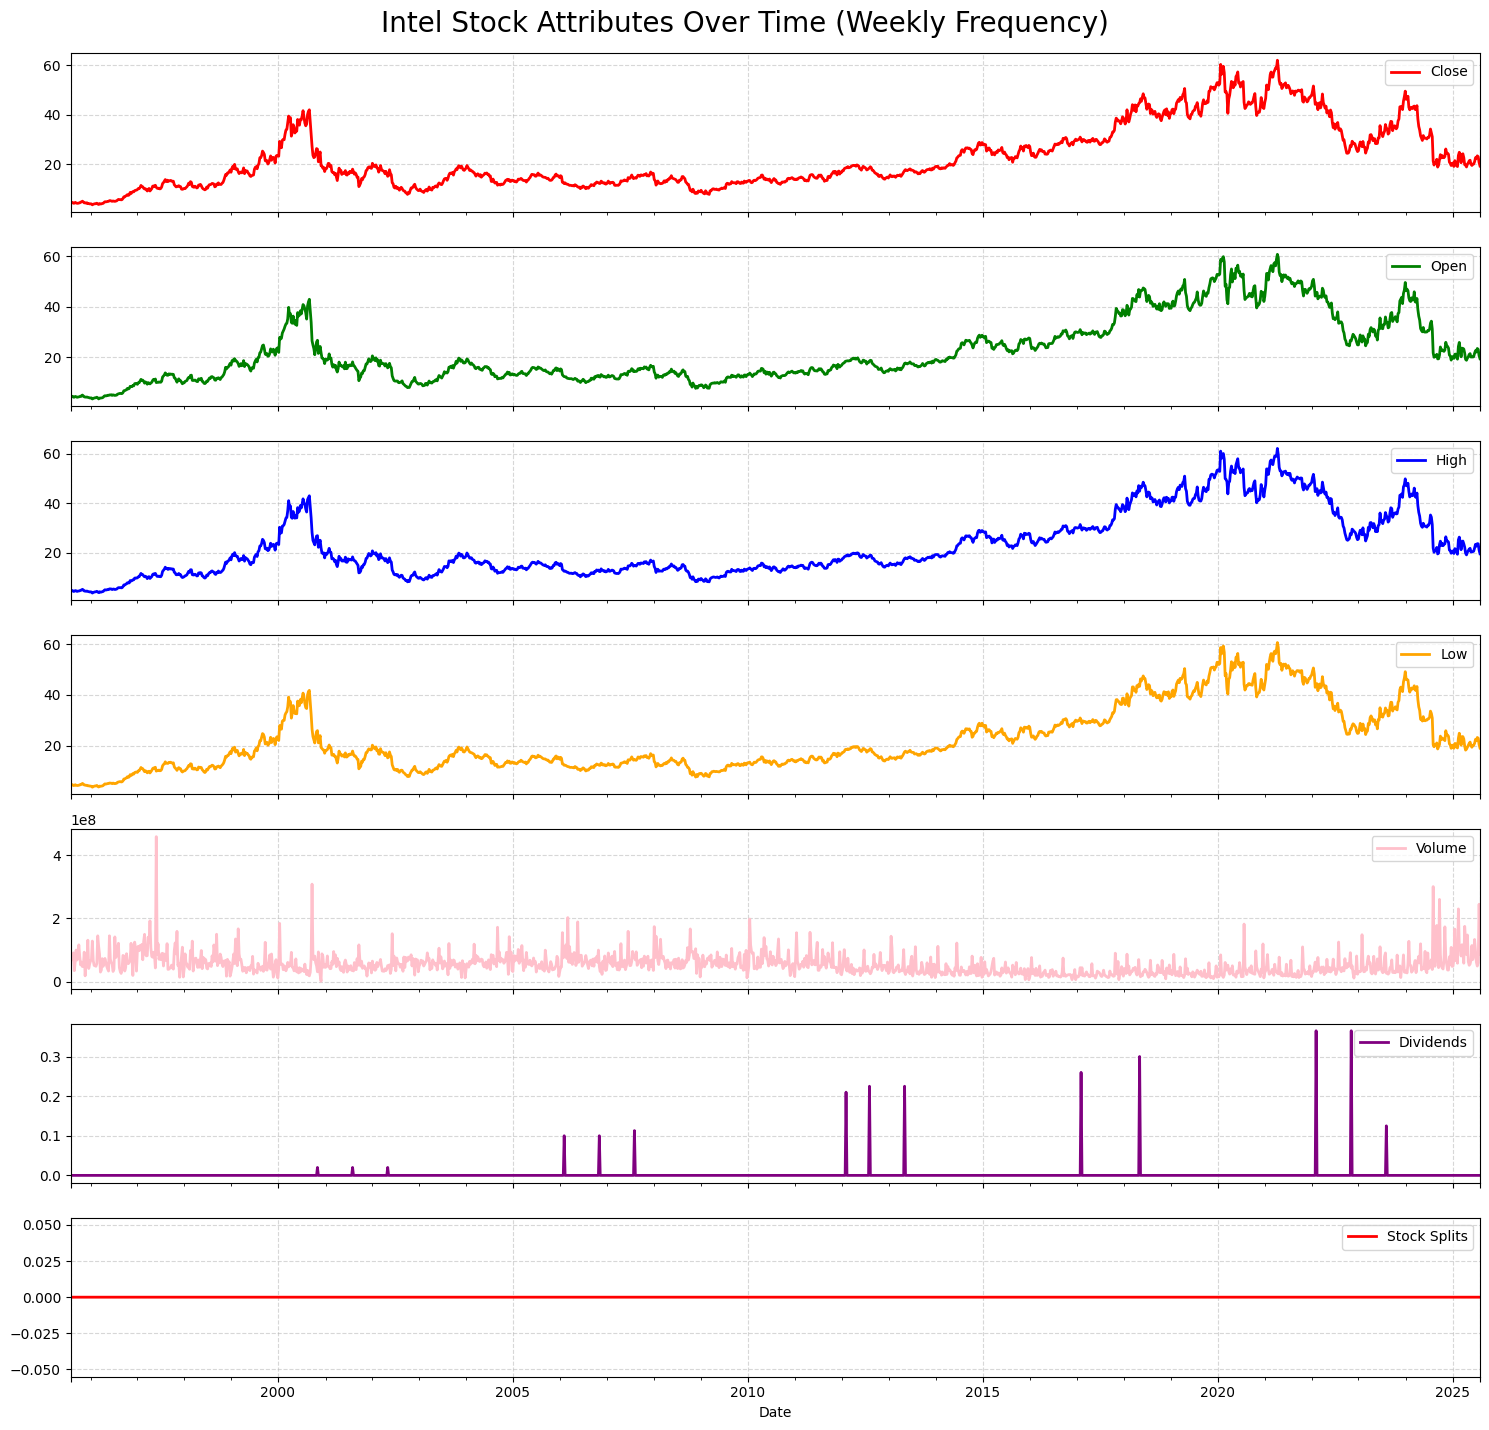

In [18]:
colors = ['red', 'green', 'blue', 'orange', 'pink', 'purple']

df_weekly = df.asfreq('W', method='ffill')
df_weekly.plot(subplots=True, figsize=(15, 15), style='-', color=colors, linewidth=2)
plt.suptitle("Intel Stock Attributes Over Time (Weekly Frequency)", fontsize=20, y=0.95)
for ax in plt.gcf().get_axes():
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_title(ax.get_title(), fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()   

## Monthly Component

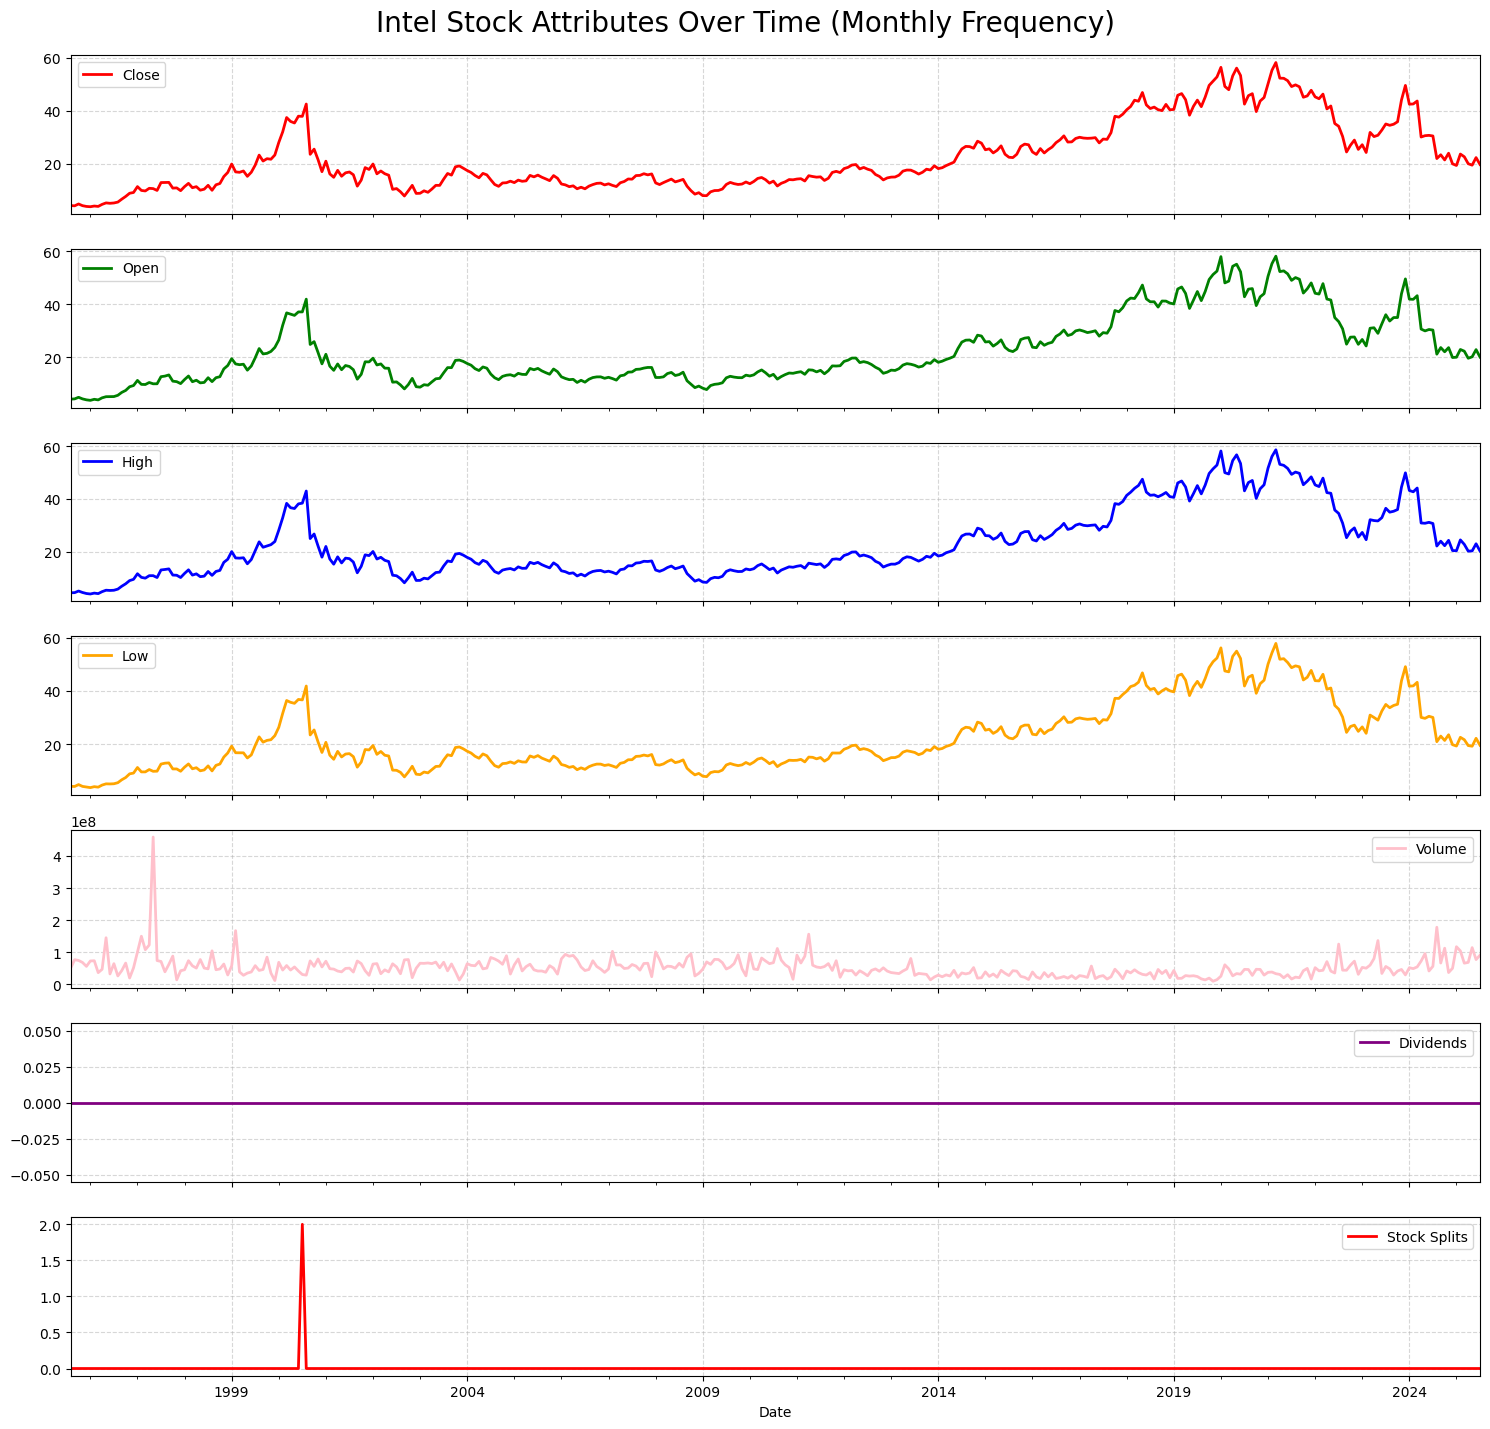

In [19]:
colors = ['red', 'green', 'blue', 'orange', 'pink', 'purple']
df_monthly = df.asfreq("M", method='ffill')
df_monthly.plot(subplots=True, figsize=(15, 15), style='-', color=colors, linewidth=2)
plt.suptitle("Intel Stock Attributes Over Time (Monthly Frequency)", fontsize=20, y=0.95)
for ax in plt.gcf().get_axes():
    ax.grid(True, linestyle = '--', alpha=0.5)
    ax.set_title(ax.get_title(), fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


## Candlestick Chart of Intel

In [20]:
import plotly.graph_objs as go
from datetime import datetime

candletrace = go.Candlestick(
    x=df.index,
    open=df['Open'],
    high=df['High'],
    low=df['Low'],
    close=df['Close'],
    name = "INTC",
    increasing=dict(line=dict(color="#067c0c"), fillcolor='#ccf5e7'),
    decreasing=dict(line=dict(color="#ff2600"), fillcolor='#fde2dd'),
    hovertext=df.index.strftime('%Y-%m-%d'),
    hoverinfo='x+y+name'
)

layout = go.Layout(
    title=dict(
        text='Candlestick Chart of INTC',
        x=0.5,
        font = dict(size=24, color='#264653', family="Arial Black")
    ),
    xaxis=dict(
        title="Date",
        color='#264653',
        showgrid=True,
        gridcolor = 'lightgray',
        rangeslider=dict(visible=False)
    ),
    yaxis=dict(
        title="Price",
        color='#264653',
        showgrid=True,
        gridcolor='lightgray',
        showline=True,
        rangemode='normal',
    ),
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(240, 248, 255, 0.95)',
)

fig = go.Figure(data=[candletrace], layout=layout)

fig.show()

## Yearly Mean Prices

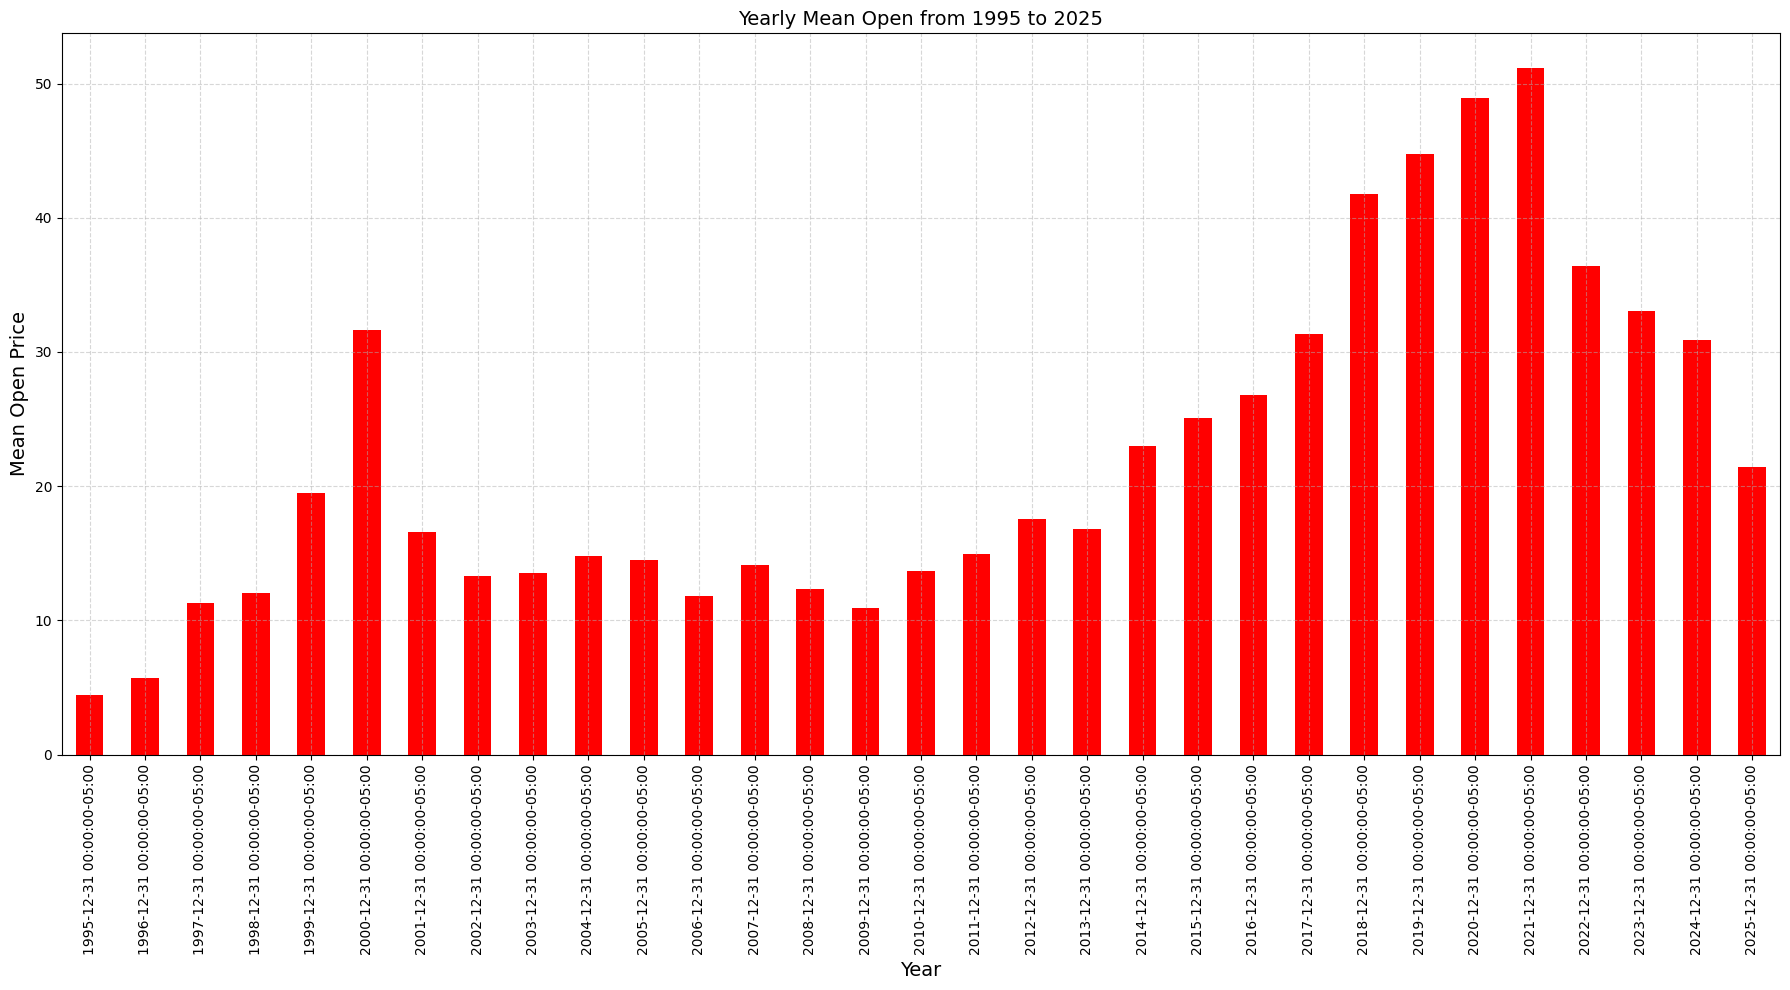

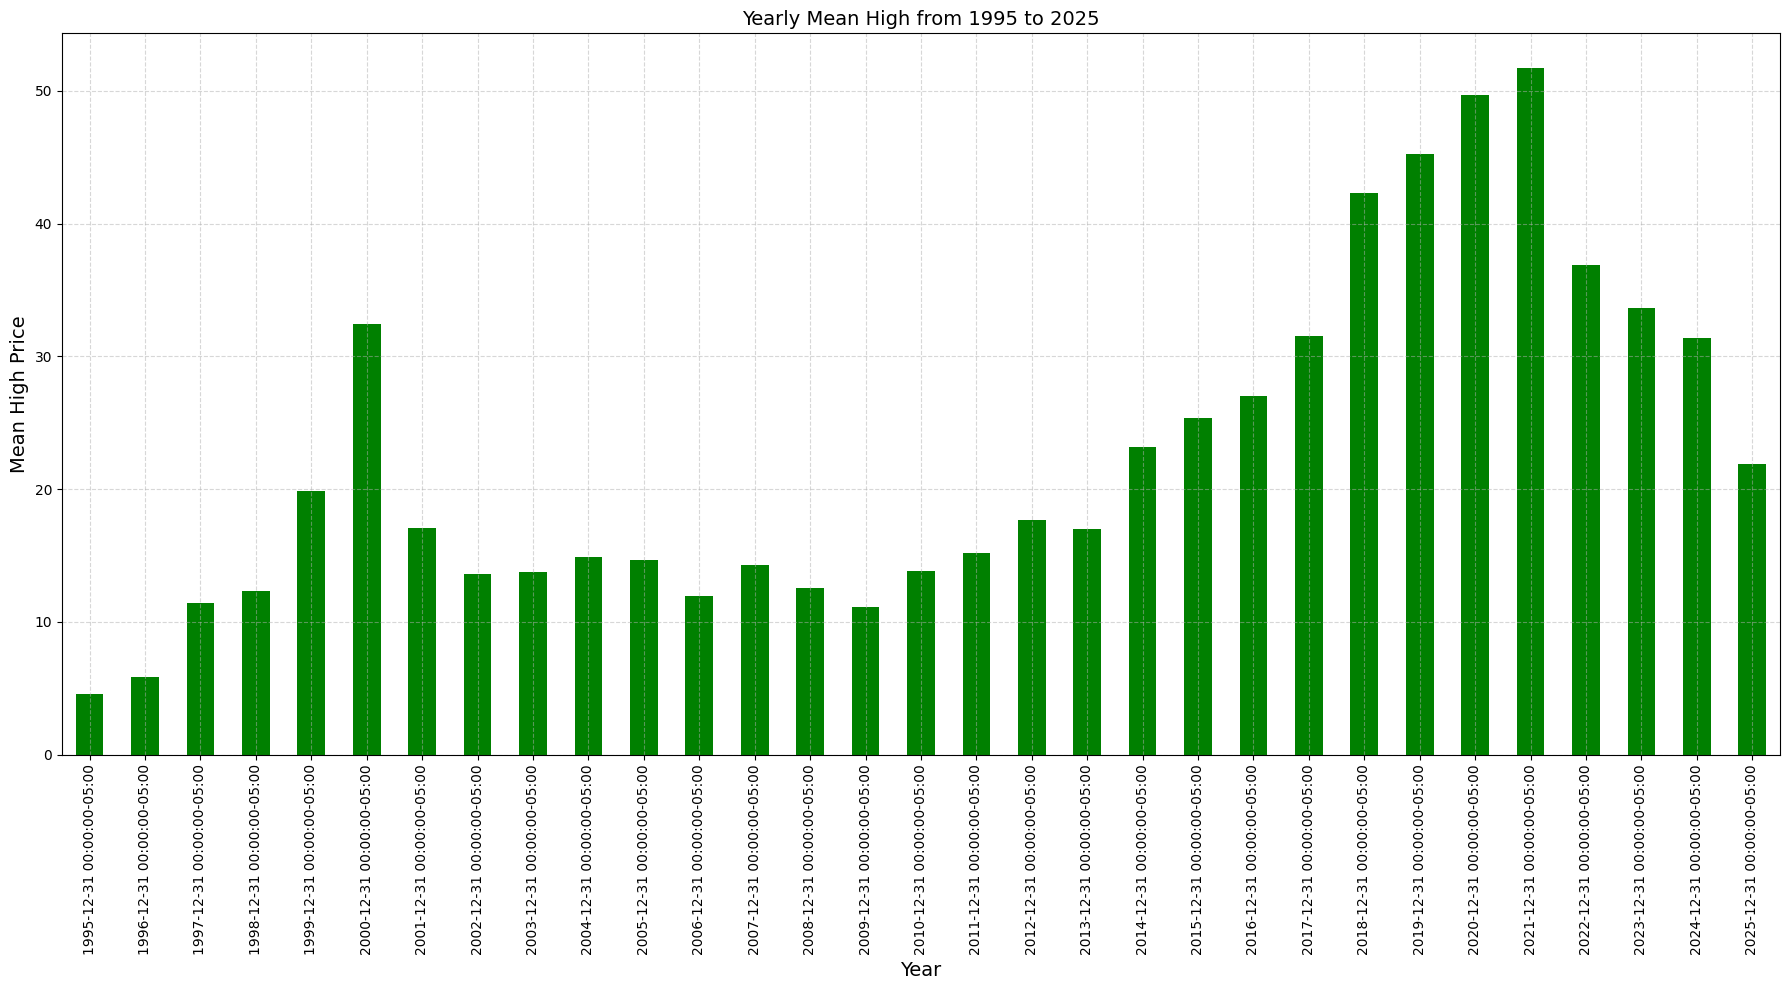

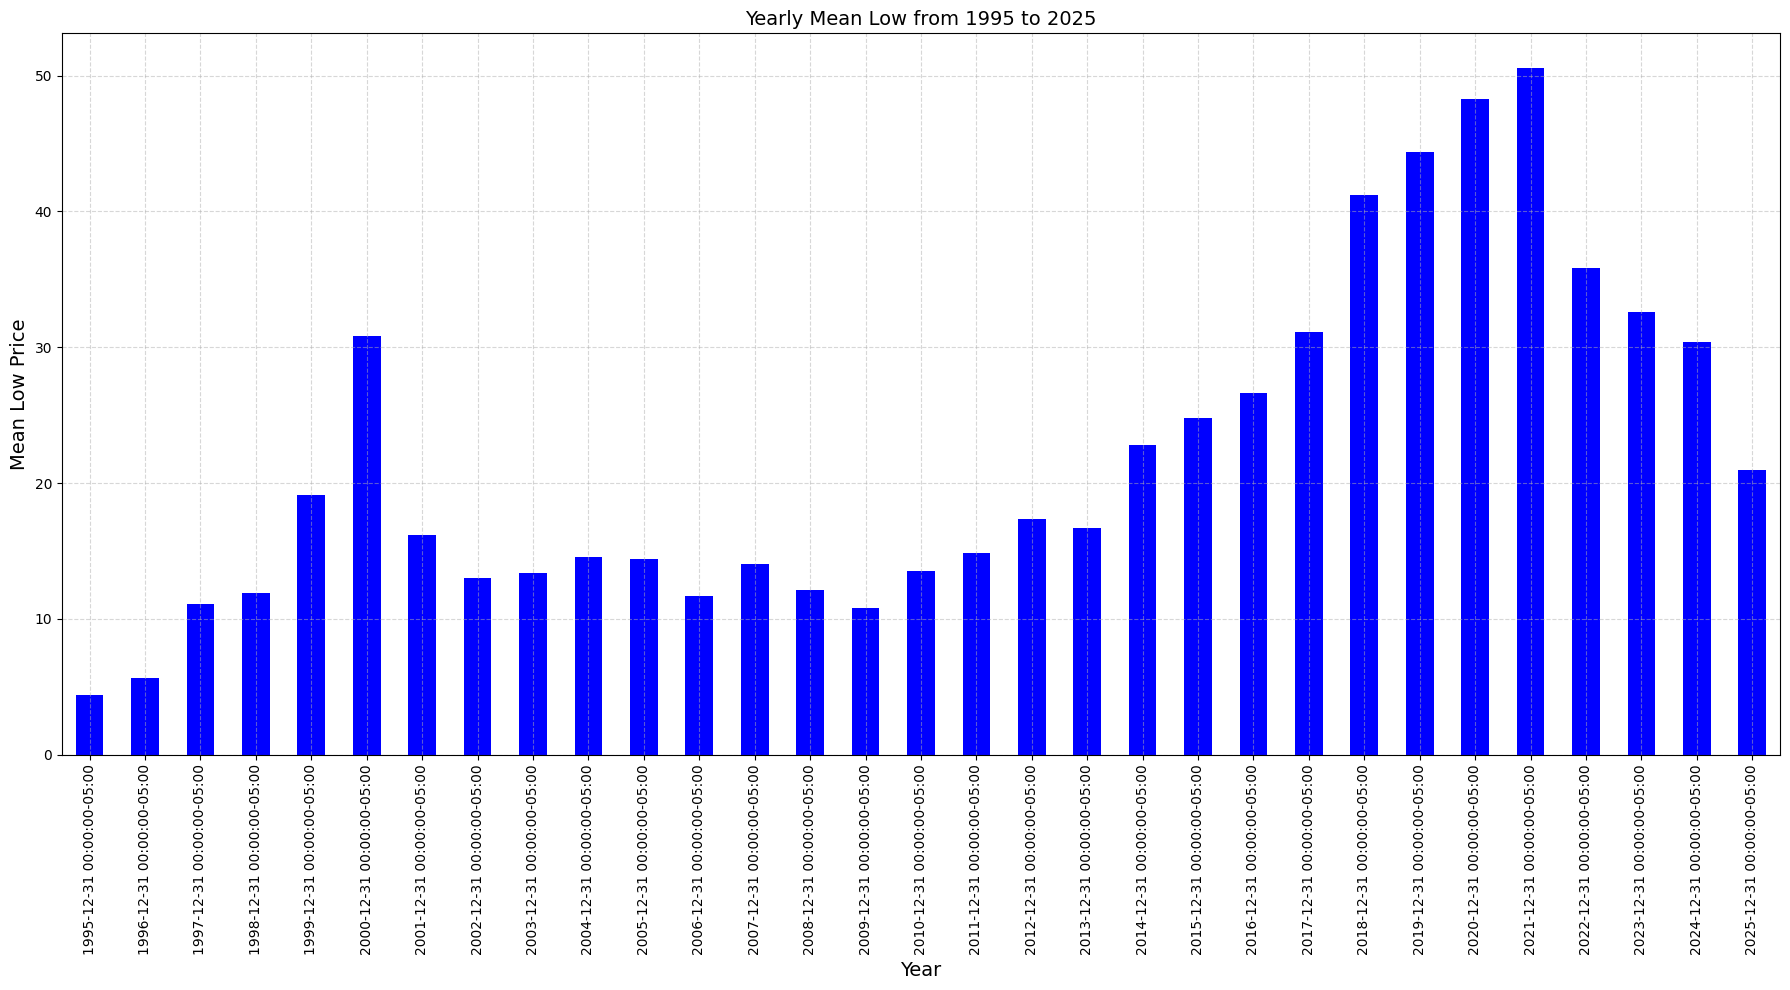

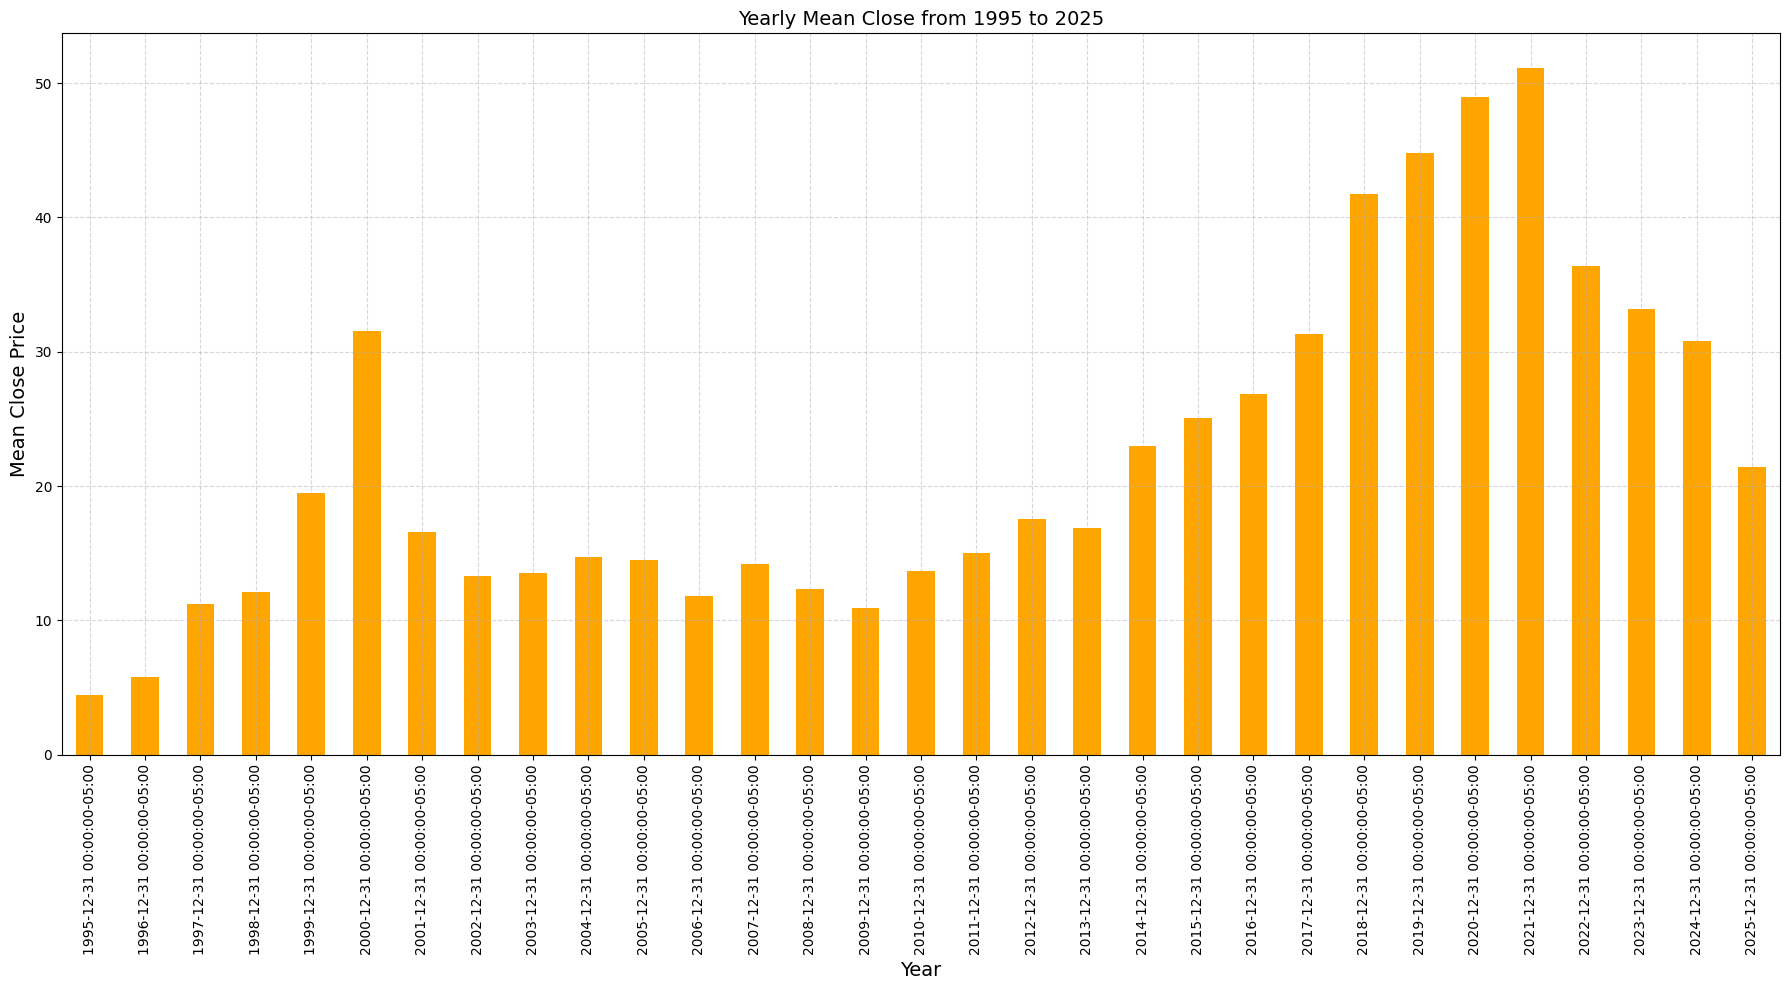

In [21]:
import math
import yfinance as yf
import datetime as dt
colors = ['red', 'green', 'blue', 'orange']
columns = ['Open', 'High', 'Low', 'Close']

for i, col in enumerate(columns):
    plt.figure(figsize=(18, 10))
    df[col].resample("A").mean().plot(kind='bar', color=colors[i])

    plt.title(f'Yearly Mean {col} from {df.index.year.min()} to {df.index.year.max()}', fontsize=14)
    plt.xlabel("Year", fontsize=14)
    plt.ylabel(f'Mean {col} Price', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()




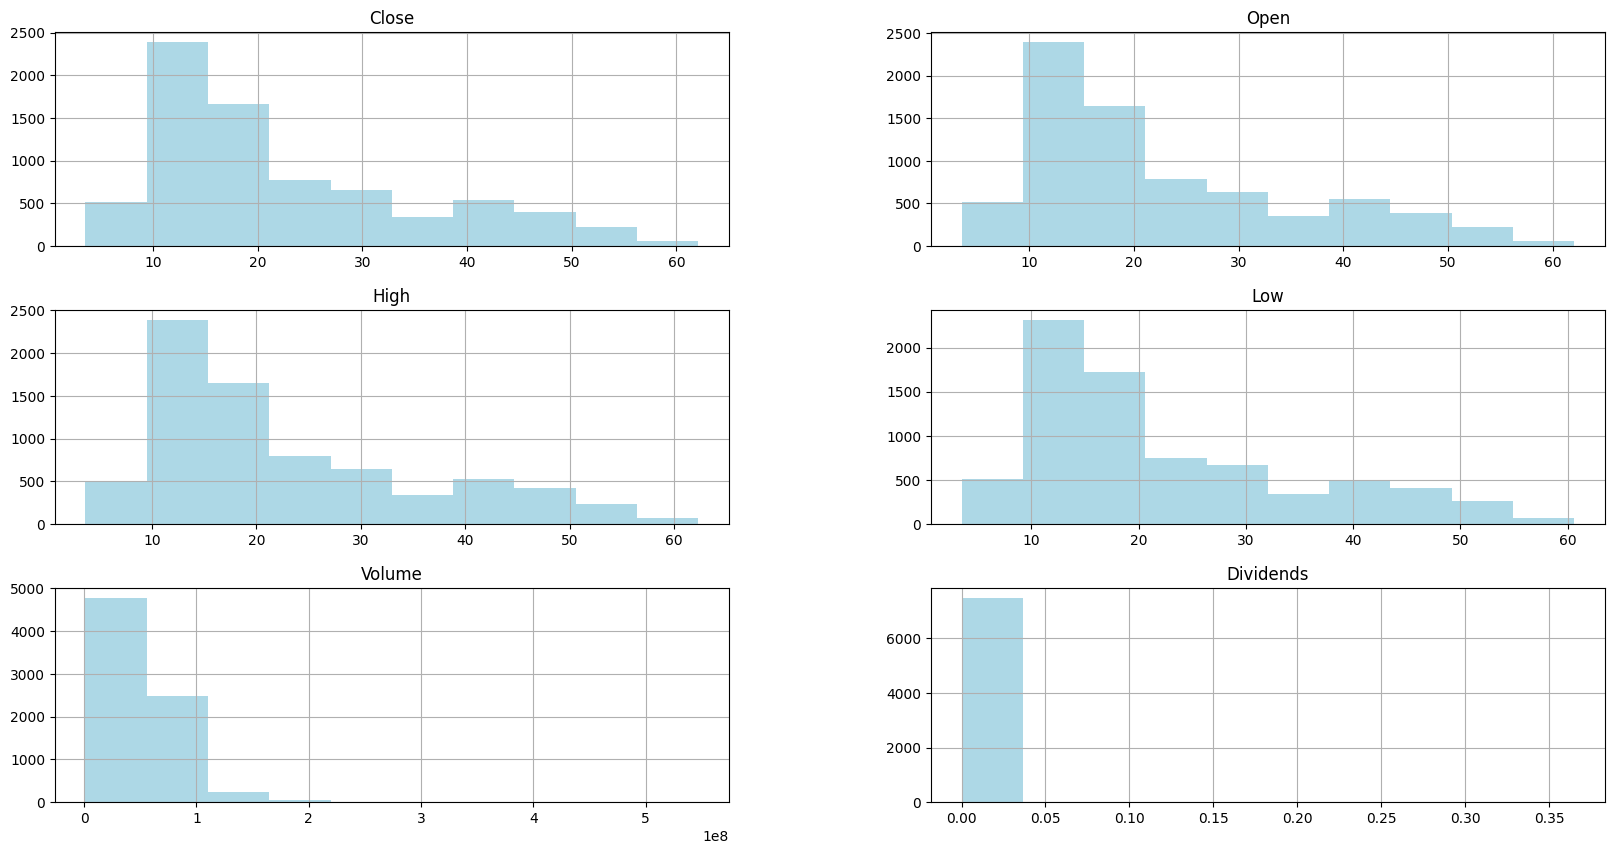

In [22]:
df1 = df.copy()
df1.drop("Stock Splits", axis=1, inplace=True)
fig = plt.figure(figsize=(20, 10))
ax = fig.gca()
hist = df1.hist(ax=ax, color = "lightblue")

## SMA (Simple Moving Average)

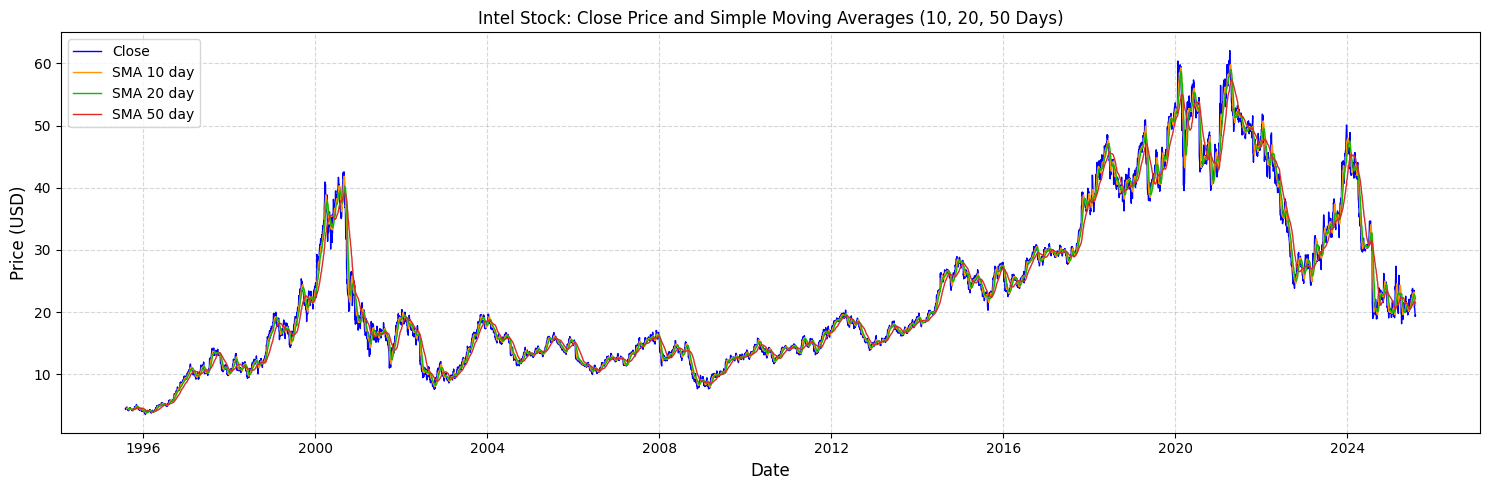

In [23]:
md = [10, 20, 50]
colors = ["#ff9500", "#12b900", "#DF2A2A"]

for i, SMA in enumerate(md):
    col = f'SMA {SMA} day'
    df[col] = df['Close'].rolling(SMA).mean()

plot_cols = ['Close'] + [f'SMA {SMA} day' for SMA in md]
plot_colors = ['blue'] + colors

plt.figure(figsize=(15, 5))
for i, col in enumerate(plot_cols):
    plt.plot(df.index, df[col], label=col, color=plot_colors[i], linewidth=1)

plt.title("Intel Stock: Close Price and Simple Moving Averages (10, 20, 50 Days)")
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

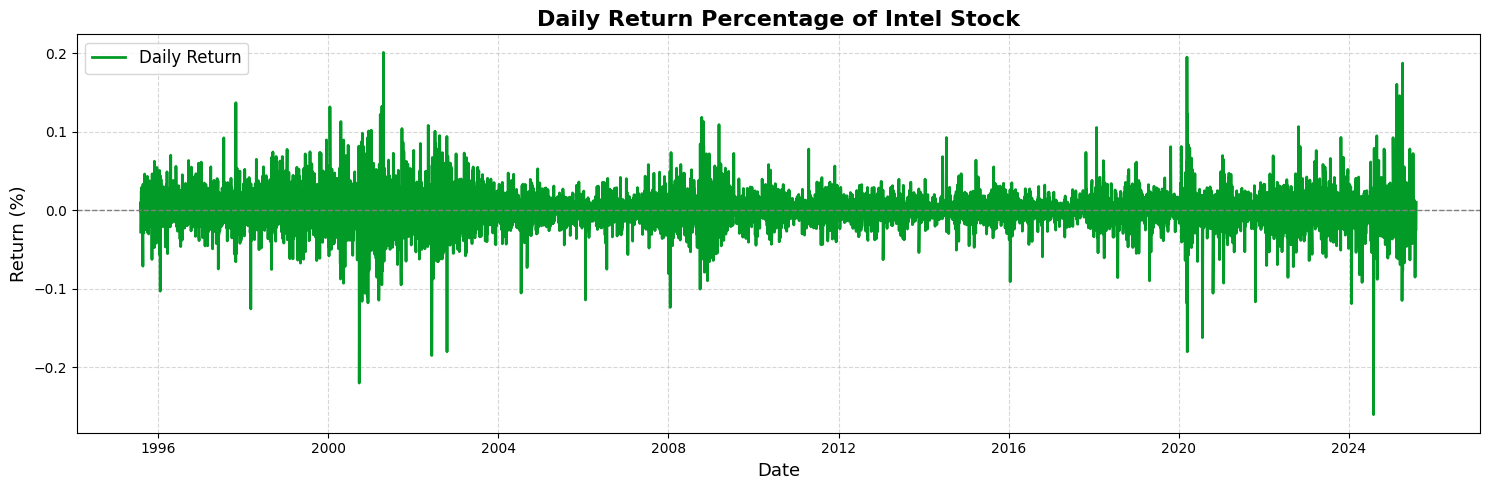

In [24]:
import matplotlib.pyplot as plt

# Tính phần trăm giá trị lợi nhuận mỗi ngày so với ngày trước đó
df['Daily_Return']=df['Close'].pct_change()

plt.figure(figsize=(15, 5))
plt.plot(df.index, df["Daily_Return"], color="#039b27", linewidth=2, label="Daily Return")

# df['Daily_Return_SMA10'] = df['Daily_Return'].rolling(window=10).mean()
# plt.plot(df.index, df["Daily_Return_SMA10"], color="#b3b61d", linewidth=2, linestyle='--', label='10 Day SMA')

# df['Daily_Return_SMA20'] = df['Daily_Return'].rolling(window=20).mean()
# plt.plot(df.index, df["Daily_Return_SMA20"], color='#e76f51', linewidth=2, linestyle='--', label='20 Day SMA')

plt.axhline(0, color="gray", linewidth=1, linestyle='--')

plt.title('Daily Return Percentage of Intel Stock', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=13)
plt.ylabel('Return (%)', fontsize=13)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

In [25]:
df.columns

Index(['Close', 'Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits',
       'SMA 10 day', 'SMA 20 day', 'SMA 50 day', 'Daily_Return'],
      dtype='object')

In [26]:
from IPython.display import Image
from keras.utils import plot_model
from keras.models import Sequential
from IPython.display import Image, display
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Embedding, SpatialDropout1D, Bidirectional, LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

2025-08-05 13:11:15.485453: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [27]:
df2 = df.copy(deep=True)

scaler = MinMaxScaler(feature_range=(-1, 1))

columns = ['Open', 'High', 'Low', 'Close', 'Volume']

for col in columns:
    df2[col] = scaler.fit_transform(df2[col].values.reshape(-1, 1))


selected_columns = ['Open', 'High', 'Low', 'Volume', 'Close']
df_array = df2[selected_columns].values

print('Shape of scaled data: ',df_array.shape)

Shape of scaled data:  (7552, 5)


# Modeling (Tensorflow)

## RNN (Recurrent Neural Networks)

In [28]:
# Preparing Data for Time Series
seq_len = 11 #Lấy độ dài mỗi chuỗi
sequences = [] #Luu các chuỗi vào danh sách

for i in range(len(df_array)-seq_len + 1):
    seq = df_array[i : i + seq_len]
    sequences.append(seq)

sequences = np.array(sequences)
print("Shape of Sequences: ", sequences.shape)

Shape of Sequences:  (7542, 11, 5)


### Splitting the dataset

In [29]:
def split_data(sequences):
    train_data, test_data = train_test_split(sequences, test_size=0.2, shuffle=False)
    val_data, test_data = train_test_split(test_data, test_size=0.5, shuffle=False)
    return train_data, test_data, val_data

In [30]:
train_data, test_data, val_data = split_data(sequences)
print("Train Data:", train_data.shape, "Validation Data:", val_data.shape, "Test Data:", test_data.shape)

Train Data: (6033, 11, 5) Validation Data: (754, 11, 5) Test Data: (755, 11, 5)


In [31]:
X_train = train_data[:, :-1, :]
y_train = train_data[:, -1, -1]

X_test = test_data[:, :-1, :]
y_test = test_data[:, -1, -1]

X_valid = val_data[:, :-1, :]
y_valid = val_data[:, -1, -1]

print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")
print(f"X_valid: {X_valid.shape}, y_valid: {y_valid.shape}")

X_train: (6033, 10, 5), y_train: (6033,)
X_test: (755, 10, 5), y_test: (755,)
X_valid: (754, 10, 5), y_valid: (754,)


### Defining Model 
Using Long Short-term Memory (LSTM) to capture sequential infomation.

In [32]:
class LSTMRegressor(Model):
    def __init__(self, input_shape, units1=64, units2=32, Dense_units = 64):
        super(LSTMRegressor, self).__init__()

        self.lstm1 =  Bidirectional(LSTM(units1, return_sequences=True, kernel_regularizer=l2(1e-5)))
        #self.batchnorm1=BatchNormalization()
        self.dropout1 = Dropout(0.1)
        self.lstm2 = LSTM(units2, return_sequences=False, kernel_regularizer=l2(0.0001))
        self.batchnorm2=BatchNormalization()
        self.dropout2 = Dropout(0.2)
        self.dense1 = Dense(Dense_units, activation='relu', kernel_regularizer=l2(0.0001))
        self.dense2 = Dense(8, activation='relu')
        self.output_layer = Dense(1)

    
    def call(self, inputs, training=False):
        x = self.lstm1(inputs)
        #x = self.batchnorm1(x, training=training)
        x = self.dropout1(x, training=training)
        x = self.lstm2(x)
        x = self.batchnorm2(x, training=training)
        x = self.dropout2(x, training=training)
        x = self.dense1(x)
        x = self.dense2(x)
        return self.output_layer(x)


input_shape = (X_train.shape[1], X_train.shape[2])
model = LSTMRegressor(input_shape)

optimizer = Adam(learning_rate=1e-4)
model.compile(optimizer=optimizer, loss='mean_squared_error')

early_stoping = EarlyStopping(
    monitor='val_loss',
    patience=30,
    restore_best_weights=True
)


history = model.fit(
    X_train, y_train,
    epochs = 50,
    batch_size = 128,
    validation_data=(X_valid, y_valid),
    callbacks=[early_stoping]
)


2025-08-05 13:11:17.340835: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-08-05 13:11:17.350831: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-08-05 13:11:17.350882: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-08-05 13:11:17.352161: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-08-05 13:11:17.352207: I external/local_xla/xla/stream_executor

Epoch 1/50


2025-08-05 13:11:20.936361: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.1976 - val_loss: 0.3154
Epoch 2/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0772 - val_loss: 0.3192
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0564 - val_loss: 0.3054
Epoch 4/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0457 - val_loss: 0.2851
Epoch 5/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0443 - val_loss: 0.2603
Epoch 6/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0397 - val_loss: 0.2196
Epoch 7/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0364 - val_loss: 0.1720
Epoch 8/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0347 - val_loss: 0.1438
Epoch 9/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0366 - val_loss: 0.1091
Epoch 10/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0323 - val_loss: 0.0984
Epoch 11/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0311 - val_loss: 0.0779
Epoch 12/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0311 - val_l

In [33]:
y_pred = model.predict(X_test)

test_loss = model.evaluate(X_test, y_test)
print("Test Loss:",test_loss)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0139
Test Loss: 0.013937536627054214


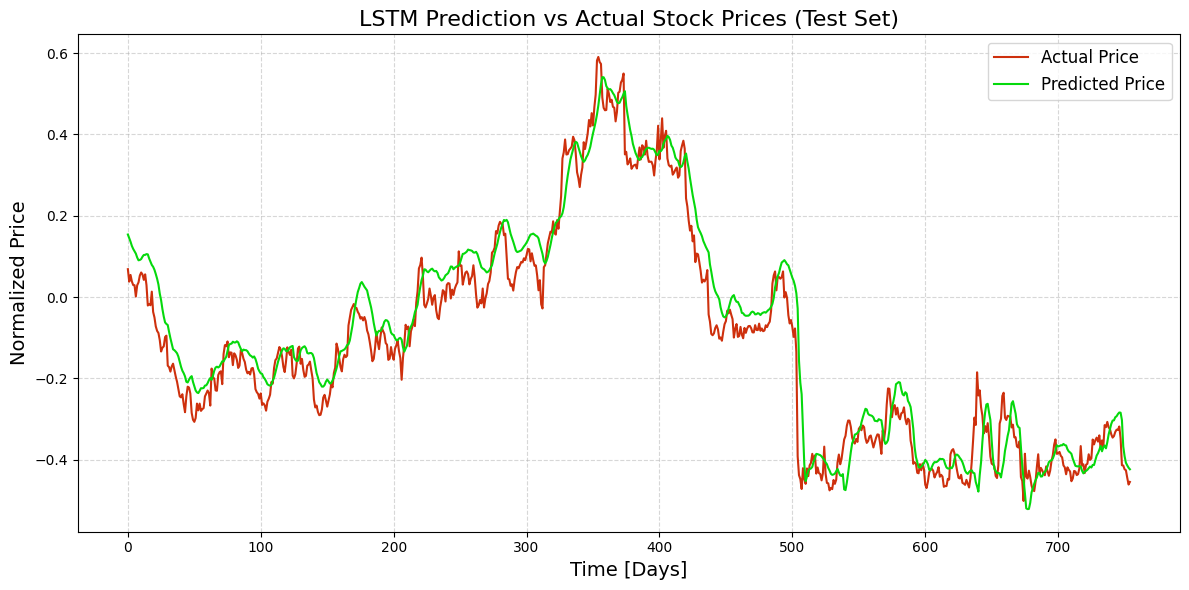

In [34]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, color="#ce300d", label = "Actual Price")

plt.plot(y_pred, color = "#05d90c", label = "Predicted Price")

plt.title("LSTM Prediction vs Actual Stock Prices (Test Set)", fontsize=16)
plt.xlabel('Time [Days]', fontsize=14)
plt.ylabel('Normalized Price', fontsize=14)
plt.legend(loc='best', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

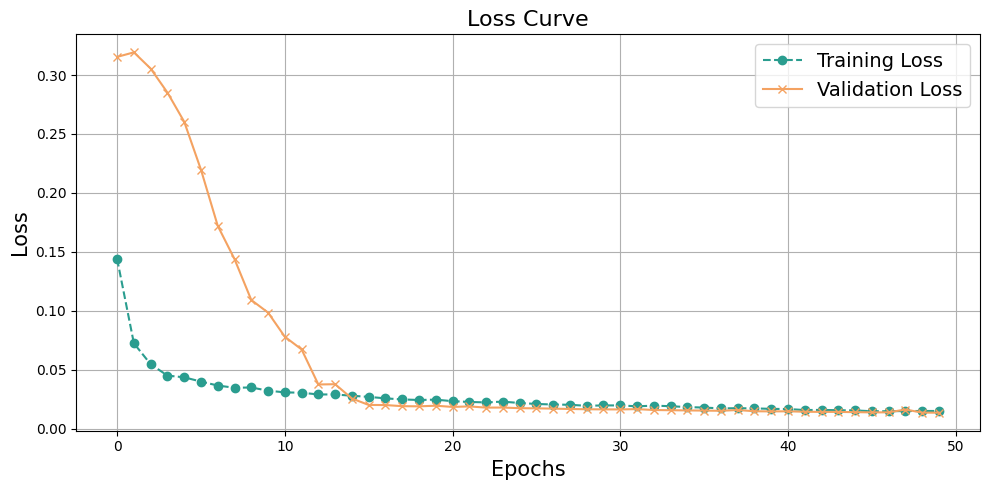

In [35]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss', color='#2a9d8f', marker='o', linestyle='--')
plt.plot(history.history['val_loss'], label='Validation Loss', color='#f4a261', marker='x', linestyle='-')

plt.title("Loss Curve", fontsize=16)
plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.legend(fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

In [36]:
print("Model Summary")
model.summary()

Model Summary


Model: "lstm_regressor"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 10, 128)        │        35,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        20,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 177,525 (693.46 KB)

 Trainable params: 59,153 (231.07 KB)

 Non-trainable params: 64 (256.00 B)

 Optimizer params: 118,308 (462.14 KB)

In [43]:
# Khởi tạo mô hình
input_shape = (X_train.shape[1], X_train.shape[2])  # ví dụ: (11, 5)
model_lstm = LSTMRegressor(input_shape=input_shape)

# Build với batch size bất kỳ (None hoặc cụ thể), ví dụ:
model_lstm.build(input_shape=(None, *input_shape))


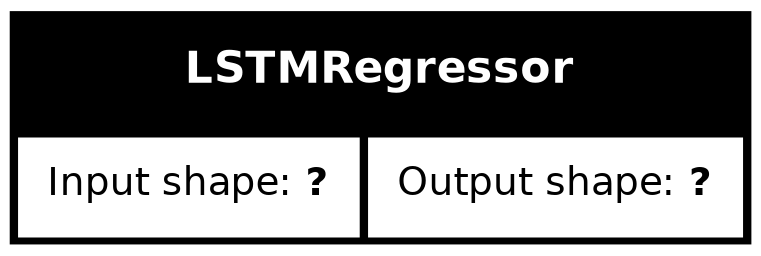

In [44]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image, display
import os

# Save the model architecture as an image
plot_model(model, to_file='model_architecture.png', show_shapes=True)

# Display the saved model architecture image
Image(filename='model_architecture.png')
